<div id="container" style="position:relative;">
<div style="float:left"><h1> Satellite imagery multi-label classification
<h2>[Final Project]<h2></h1>
</div>
</div>

<div id="container" style="position:relative;">
<div style="float:left"><h1>1. Introduction </h1>
Classify satellite images with atmospheric conditions and various classes of land cover/land use.  The labels can broadly be broken into three groups: atmospheric conditions, common land cover/land use phenomena, and rare land cover/land use phenomena.
</div>
</div>

<div id="container" style="position:relative;">
<div style="float:left"><h1>2. Data </h1>

-  train.csv - contains the training file names and their labels, the labels are space-delimited
-  sample_submission.csv - contains all the files in the test set
-  train-jpg.zip - images for the train set
-  test-jpg.zip - images for the test set
</div>
</div>

<div id="container" style="position:relative;">
<div style="float:left"><h1>5. Results </h1>
<br>
</div>
</div>

### Conda environment

In [1]:
import sys
print(sys.executable)
# !whoami

C:\Users\Volvokov\Anaconda3\envs\keras\python.exe


### Loading Libraries

In [2]:
#Pandas and nparray libraries
import pandas as pd
import numpy as np

#Models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.externals import joblib

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.metrics import fbeta_score, precision_score, make_scorer, average_precision_score, precision_recall_fscore_support
from keras.callbacks import Callback
from keras import backend as K
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN
from keras.preprocessing import image
import keras

#Handle Imbalance classes
from sklearn.utils import class_weight

#Neural Networks Libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
import h5py
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K


#Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
#Allow plotting Offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
init_notebook_mode()

#Image processing libraries
from PIL import Image
from PIL import ImageFilter
from PIL import ImageOps

#Plot libraries
import imageio
from PIL import Image

import cv2
import matplotlib.image as mpimg

#Environmental system librairies
from time import sleep
import timeit
import time
import sys
from tqdm import tqdm

#System File libraries
import glob, os
import os
from smart_open import smart_open

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


## Functions

In [3]:
'''----------------------------------------------------------------------------------------------------
_Function Description: This function data augmentation
_Inputs:
    Param path_1 >> location of images to transforme
    Param path_2 >> location of transformed images
_Outputs: 
    Param status >> status of operations
----------------------------------------------------------------------------------------------------'''
def DataAugmentation(path_1, path_2):
    n_sam = 2
    for count in range(0,2):
        for imagefile in df_train_tags.loc[:n_sam,'image_name']:
#             os.chdir('/Users/volvokov/_Capston/data/train-jpg')
#             im=Image.open('/Users/volvokov/_Capston/data/train-jpg/{}.jpg'.format(imagefile))
            im=im.convert("RGB")
            im_flip = ImageOps.flip(im)
            im_mirror = ImageOps.mirror(im)
            im_blur=im.filter(ImageFilter.GaussianBlur)
            im_unsharp=im.filter(ImageFilter.UnsharpMask)
    
#             os.chdir('/Users/volvokov/_Capston/data/copy')
            im_flip.save(imagefile+'_mirror_'+str(count), format='JPEG')    
            im_mirror.save(imagefile+'_mirror_'+str(count), format='JPEG')
            im_blur.save(imagefile+'_blur_'+str(count), format='JPEG')
            im_unsharp.save(imagefile+'_unsharp_'+str(count), format='JPEG')

        #     print(im_flip.format)    
        #     print(im_unsharp.format)
        return status

In [4]:
'''----------------------------------------------------------------------------------------------------
_Function Description: Prepare images for MobileNet
_Inputs:
    Param path >> location of images to load
_Outputs: 
    Param status >> MobileNet images preformatted
----------------------------------------------------------------------------------------------------'''
def prepare_image(path):
#     img_path = ''
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)

    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [5]:
'''----------------------------------------------------------------------------------------------------
_Function Description: Define of the CNN architecture
_Inputs:
    Param Labels >> # of labels
_Outputs: None
----------------------------------------------------------------------------------------------------'''
def CNN_Architecture(labels):
    CNN_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(256, 256, 4)))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))
    CNN_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))
    CNN_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))
    CNN_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))
    CNN_model.add(Flatten())
    CNN_model.add(Dense(128, activation='relu'))
    CNN_model.add(Dropout(0.5))
    CNN_model.add(Dense(64, activation='relu'))
    CNN_model.add(Dropout(0.5))
    CNN_model.add(Dense(labels, activation='sigmoid'))
    
    CNN_model.summary()

In [6]:
'''----------------------------------------------------------------------------------------------------
_Function Description: Callback for F2 score for neural network
_Inputs:
    Param Callback >> Callback
_Outputs: F2 score result
----------------------------------------------------------------------------------------------------'''
class Fbeta(Callback):
    def on_train_begin(self, logs={}):
        self.fbeta = []
        
    def on_epoch_end(self, epoch, logs ={}):
        p_valid = self.model.predict(self.validation_data[0])
        y_val = self.validation_data[1]
        f_beta = fbeta_score(y_val, np.array(p_valid) > 0.2, beta=2, average='samples')
        self.fbeta.append(f_beta)
        print("____F2_score: %f" %(f_beta))
        return

In [7]:
'''----------------------------------------------------------------------------------------------------
_Function Description: Prepare images for VGG16
_Inputs:
    Param path >> location of images to load
_Outputs: 
    Param status >> VGG16 images preformatted
----------------------------------------------------------------------------------------------------'''
def PrepareImageVGG(path):
    #Load image in format 224x224
    image = load_img(path, target_size=(224, 224))

    # convert the image pixels to a numpy array
    image = img_to_array(image)
    
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    # prepare the image for the VGG model
    image = preprocess_input(image)    
    
    return image

In [8]:
'''----------------------------------------------------------------------------------------------------
_Function Description: Encode Labels
_Inputs:
    Param labels >> list of labels
_Outputs: None
----------------------------------------------------------------------------------------------------'''
def EncodeLabels(labels):
    #Encode the labels
    my_encoder = LabelEncoder()
    # Fitting the encoder with the labels from 'label_map':
    my_encoder.fit(tags_bin.classes_)
    # Verifying the encoding:
    for i, j in enumerate(labels):
        print(f'{i}: {j}')
    #     my_encoder.classes_

## Load data
Data description:

- Labels: describing the environmental conditions and landscape on satellite images
- Imgages: compose of 256x256 pixels and 4 channels

<font color=blue>**Load Train/Test Labels** </font>

In [9]:
#Load *.csv files as DataFrames
df_train_tags = pd.read_csv("/Users/Volvokov/_Data Science Application/___Capstone/data/train_v2.csv")
# df_train_tags = smart_open('s3://capston2019/{train_v2.csv')

df_test_tags = pd.read_csv("/Users/Volvokov/_Data Science Application/___Capstone/data/sample_submission_v2.csv")
# df_test_tags = smart_open('s3://capston2019/{sample_submission_v2.csv')

In [10]:
#Loaded Data shape
print('Loaded train shape {}'.format(df_train_tags.shape))
print('Loaded test shape  {}'.format(df_test_tags.shape))

Loaded train shape (40479, 2)
Loaded test shape  (61191, 2)


<font color=blue>**Load Train/Test Images** </font>

**Train images**

In [11]:
#Define the number of sample to work with
n_samples = 10000

In [13]:
images = []

for filename in tqdm(df_train_tags.head(n_samples)['image_name'].values):
#     img = imageio.imread(smart_open('s3://capston2019/train_jpg/{}.jpg'.format(filename)))
    img = plt.imread('/Users/Volvokov/_Data Science Application/___Capstone/data/train-jpg/{}.jpg'.format(filename))
    images.append(img)

images_load = np.array(images)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:25<00:00, 397.22it/s]


In [14]:
joblib.dump(images_load, 'images_load_10K.pkl')

['images_load_10K.pkl']

In [16]:
# os.chdir('/Users/volvokov/_Capston')
images_load = joblib.load('images_load_10K.pkl')

In [17]:
print('Images samples loaded shape {}'.format(images_load.shape))

Images samples loaded shape (10000, 256, 256, 4)


**Test Images**

To be use later to the final score of our model

In [18]:
#Define the number of sample to work with
n_samples_test = 10000

In [31]:
images_test = []

for filename in tqdm(df_test_tags.head(n_samples_test)['image_name'].values):
#     img = imageio.imread(smart_open('s3://capston2019/test-jpg/{}.jpg'.format(filename)))
    img_test = plt.imread('/Users/Volvokov/__Capstone/data/test-jpg/{}.jpg'.format(filename))
    images_test.append(img_test)

images_load_test = np.array(images_test)

100%|██████████| 10000/10000 [00:43<00:00, 232.22it/s]


In [32]:
joblib.dump(images_load_test, 'images_load_test_10K.pkl')

['images_load_test_10K.pkl']

In [36]:
# os.chdir('/Users/volvokov/_Capston')
images_load_test_10K = joblib.load('images_load_test_10K.pkl')

In [37]:
print('Images samples loaded shape {}'.format(images_load_test_10K.shape))

Images samples loaded shape (10000, 256, 256, 4)


## Exploratory data analysis (EDA) 

<font color=blue>**Balance of Classes** </font>

As shown below data we have classification task with very Imbalanced Classes . With around 3700 samples, **Primary** is the classe with most data and **convetional_mine** with 100 samples the less.

In [15]:
#Get all differents labels
labels = [item for sublist in list(df_train_tags['tags'].apply(lambda row: row.split(" ")).values) for item in sublist]


In [16]:
#Count all labels
labels_counts = pd.DataFrame({'tag': labels}).groupby('tag').size().reset_index().sort_values(0, ascending=False)
labels_counts.columns = ['Tags', 'Counts']


In [19]:
init_notebook_mode(connected=True)

#Display counts of labels
data=[go.Bar(x = labels_counts['Tags'], y = labels_counts['Counts'])]
#Set layout
layout=dict(height=600, width=900, title='Distribution of labels', xaxis=dict(
        title='Label/Class'), 
        yaxis=dict(title='# of images'),)

#Set figure to display
fig=dict(data=data, layout=layout)

py.iplot(fig)

<font color=blue>**Images visualization** </font>

The below shows several examples of one image per Label

In [20]:
list_landscape = np.unique(np.array(labels))
name_image = []
name_tag = []

for tag, image in enumerate(list_landscape):
    list_images = df_train_tags[df_train_tags['tags'].str.contains(image)]
    name_image.append(list_images.loc[list_images['image_name'].index[2], 'image_name'])
    name_tag.append(df_train_tags.loc[list_images['image_name'].index[2],'tags'])

In [23]:
images_2 = []

for filename in tqdm(name_image):
#     img = imageio.imread(smart_open('s3://capston2019/train_jpg/{}.jpg'.format(filename)))
    img = plt.imread('/Users/Volvokov/__Capstone/data/train-jpg/{}.jpg'.format(filename))
    images_2.append(img)

# images_2 = np.array(images)

100%|█████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 354.61it/s]


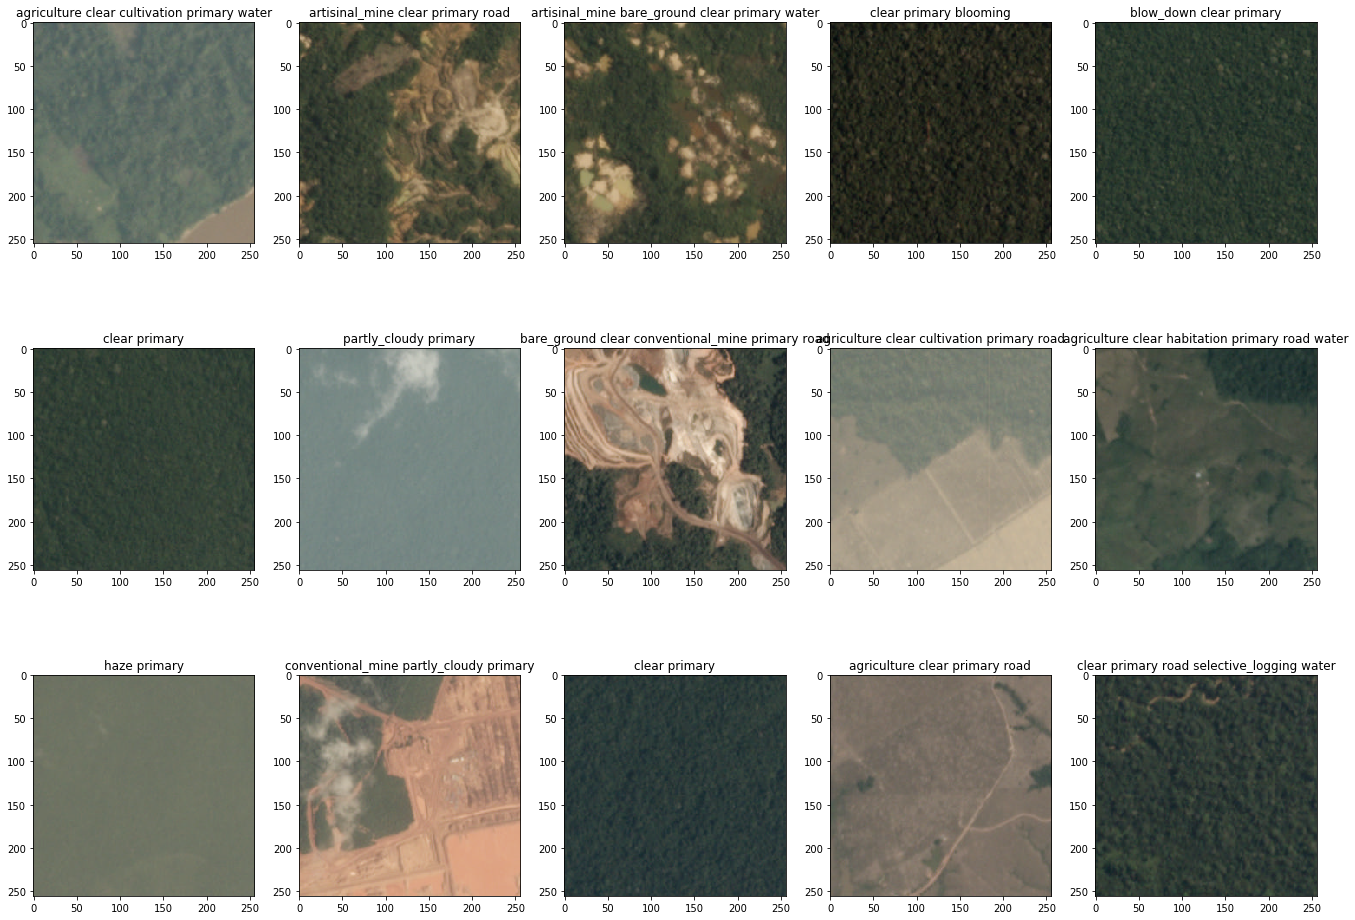

In [20]:
plt.figure(figsize = (23,23))
    
for i in range(15):
    plt.subplot(4,5,i+1)
    plt.imshow(np.array(images_2[i]))
    plt.title(name_tag[i])

plt.show()

## Preprocess Data

<font color=blue>**Define Dependable & independable Variables** </font>

- X (Dependable variable)    : Images compose of 256x256 pixels and 4 channels
- y (Independables variables): Labels describing the environmental conditions and landscape on satellite images

<font color=blue>**Feature Engineering** </font>

The first approach to balanced labels, consist in group images not having enouph data into a more high level label. As follow:

-  For partly_cloudy, cloudy, haze, water under the label **weather_label**
-  blooming, blow_down, artisinal_mine, conventional_mine, cultivation, bare_ground, selective_logging, habitation, slash_burn under the label **land_over_label**

In [19]:
#Labels to be regrouped under high level tag
list_labeltogroup = [
 'partly_cloudy',
 'cloudy',
 'haze',     
 'water',
 'blooming',
 'blow_down',
 'artisinal_mine',        
 'conventional_mine',
 'cultivation',
 'bare_ground',
 'selective_logging',
 'habitation',
 'slash_burn']

df_train_newtags = df_train_tags.copy()
last_row = str

for i,j in enumerate(list_labeltogroup):
    if i == 0:
        if j == 'partly_cloudy' or j == 'cloudy' or j == 'haze' or j == 'water':
            df_train_newtags[j] = df_train_newtags['tags'].map(lambda row: row.replace(j, 'weather_label'))
        else:
            df_train_newtags[j] = df_train_newtags['tags'].map(lambda row: row.replace(j, 'land_over_label'))
    else:
        if j == 'partly_cloudy' or j == 'cloudy' or j == 'haze' or j == 'water':
            df_train_newtags[j] = df_train_newtags[last_row].map(lambda row: row.replace(j, 'weather_label'))
        else:
            df_train_newtags[j] = df_train_newtags[last_row].map(lambda row: row.replace(j, 'land_over_label'))

    last_row = j

df_train_newtags.drop(columns=list_labeltogroup[:-1], inplace = True)
df_train_newtags.rename(columns={'slash_burn':'new_labels'}, inplace=True)

In [20]:
df_train_newtags[df_train_newtags["tags"].str.contains("habitation")].head()

image_name                                             tags  \
4     train_4        agriculture clear habitation primary road   
46   train_46             bare_ground clear habitation primary   
52   train_52  agriculture clear habitation primary road water   
59   train_59        agriculture clear habitation primary road   
67   train_67                    clear habitation primary road   

                                           new_labels  
4      agriculture clear land_over_label primary road  
46      land_over_label clear land_over_label primary  
52  agriculture clear land_over_label primary road...  
59     agriculture clear land_over_label primary road  
67                 clear land_over_label primary road

In [21]:
#Count all labels
labels_new = [item for sublist in list(df_train_newtags['new_labels'].apply(lambda row: row.split(" ")).values) for item in sublist]
labels_counts_new = pd.DataFrame({'tag': labels_new}).groupby('tag').size().reset_index().sort_values(0, ascending=False)
labels_counts_new.columns = ['Tags', 'Counts']

In [22]:
#Display counts of labels
data=[go.Bar(x = labels_counts_new['Tags'], y = labels_counts_new['Counts'])]
#Set layout
layout=dict(height=600, width=900, title='New distribution of labels')
#Set figure to display
fig=dict(data=data, layout=layout)

py.iplot(fig)

<font color=blue>**Format Independable Variable** </font>

In order to be able to allow Classifiers to make multilabel calculations, we need to vectorize images' labels using sklearn MultiLabelBinarizer method

In [23]:
# df_train_tags['split_tags'] = df_train_tags['tags'].map(lambda row: row.split(" "))
df_train_newtags['split_tags'] = df_train_newtags['new_labels'].map(lambda row: row.split(" "))

#Transform multilabels to binary matrix
# df_train_tags['split_tags'] = df_train_tags['tags'].map(lambda row: row.split(" "))
df_train_newtags['split_tags'] = df_train_newtags['new_labels'].map(lambda row: row.split(" "))
tags_bin = MultiLabelBinarizer()
# y = tags_bin.fit_transform(df_train_tags['split_tags'])
y = tags_bin.fit_transform(df_train_newtags['split_tags'])

#Get # of samples to analyse
y = y[:n_samples]

In [24]:
#Get the columns for all labels
labels_Columns = [str(i) for i in range(tags_bin.classes_.shape[0])]


In [25]:
df_y = pd.DataFrame(y)
df_y.columns = tags_bin.classes_

In [26]:
vector = df_y.copy()

df_train_tags = pd.concat([df_train_newtags, vector], axis=1)
df_train_tags.head(10)

image_name                                         tags  \
0    train_0                                 haze primary   
1    train_1              agriculture clear primary water   
2    train_2                                clear primary   
3    train_3                                clear primary   
4    train_4    agriculture clear habitation primary road   
5    train_5                           haze primary water   
6    train_6  agriculture clear cultivation primary water   
7    train_7                                 haze primary   
8    train_8        agriculture clear cultivation primary   
9    train_9   agriculture clear cultivation primary road   

                                          new_labels  \
0                              weather_label primary   
1            agriculture clear primary weather_label   
2                                      clear primary   
3                                      clear primary   
4     agriculture clear land_over_label primary road   
5                weather_label primary weather_label   
6  agriculture clear land_over_label primary weat...   
7                              weather_label primary   
8          agriculture clear land_over_label primary   
9     agriculture clear land_over_label primary road   

                                          split_tags  agriculture  clear  \
0                           [weather_label, primary]          0.0    0.0   
1       [agriculture, clear, primary, weather_label]          1.0    1.0   
2                                   [clear, primary]          0.0    1.0   
3                                   [clear, primary]          0.0    1.0   
4  [agriculture, clear, land_over_label, primary,...          1.0    1.0   
5            [weather_label, primary, weather_label]          0.0    0.0   
6  [agriculture, clear, land_over_label, primary,...          1.0    1.0   
7                           [weather_label, primary]          0.0    0.0   
8     [agriculture, clear, land_over_label, primary]          1.0    1.0   
9  [agriculture, clear, land_over_label, primary,...          1.0    1.0   

   land_over_label  primary  road  weather_label  
0              0.0      1.0   0.0            1.0  
1              0.0      1.0   0.0            1.0  
2              0.0      1.0   0.0            0.0  
3              0.0      1.0   0.0            0.0  
4              1.0      1.0   1.0            0.0  
5              0.0      1.0   0.0            1.0  
6              1.0      1.0   0.0            1.0  
7              0.0      1.0   0.0            1.0  
8              1.0      1.0   0.0            0.0  
9              1.0      1.0   1.0            0.0

Lets see what is each label position in the vector

In [27]:
# dict that maps labels to integers, and the reverse
count_labels = tags_bin.classes_.shape[0]
labels = tags_bin.classes_.tolist()

labels_map = {labels[i]:i for i in range(len(labels))}
inv_labels_map = {i:labels[i] for i in range(len(labels))}
inv_labels_map

{0: 'agriculture',
 1: 'clear',
 2: 'land_over_label',
 3: 'primary',
 4: 'road',
 5: 'weather_label'}

<font color=blue>**Format Dependable Variable** </font>

First lets assigned to X the loaded images

In [28]:
X = images_load
print('X shape: {}'.format(X.shape))

X shape: (10000, 256, 256, 4)


**Format for CLASSIFIERS**

To format images for Classifiers the below will done:

-  Reshape images: Scikit-learn Classfifier can only amnipualte dependable one dimention nparray variables
-  Scale Data    : To avoid that features with high magnitudes weigh more than features with low magnitudes
-  And finaly data will be Train/Test splitted

In [31]:
#rescaled dimentions
rescaled_dim = 60

#Flatt, rescale and reshape 
X_Classifiers = np.squeeze(np.array([cv2.resize(X[i],
                                    (rescaled_dim, rescaled_dim)).reshape(1, -1) for i in range(n_samples)]))

print('X format for Classifiers {}'.format(X_Classifiers.shape))

X format for Classifiers (10000, 14400)


In [32]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_Classifiers, y, test_size = 0.3, random_state = 42)

#Scale data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Format for CNN neural networks**

To be compatible with the predefined format expected when using CNN Neural Networks, the below will be done:

-  Train/Test split
-  Scale Train/Test data set to be between 0 and 1

In [46]:
#Reshape to neural network shape
X_train_CNN, X_test_CNN, y_train_CNN, y_test_CNN = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [40]:
# Modify the X values to be 0-1 instead of 0-255
X_train_CNN = X_train_CNN.astype('float32')
X_test_CNN = X_test_CNN.astype('float32')
X_train_CNN /= 255
X_test_CNN /= 255
print(f'X_train range: {X_train_CNN.min()}-{X_train_CNN.max()}')

X_train range: 0.0-1.0


In [97]:
print('X_train_CNN {}'.format(X_train_CNN.shape))
print('y_train_CNN {}'.format(y_train_CNN.shape))
print('X_test_CNN {}'.format(X_test_CNN.shape))
print('y_test_CNN {}'.format(y_test_CNN.shape))

X_train_CNN (7000, 256, 256, 4)
y_train_CNN (7000, 17)
X_test_CNN (3000, 256, 256, 4)
y_test_CNN (3000, 17)


**Format for Transfer Learning Neural Networks**
In order to use pre-trained neural networks images needs to be format according to the predefined format used to train those models:

-  For MobileNet the function prepare_image() will be used to format data
-  For VGG16 the function PrepareImageVGG() will be used to format data  

**MobileNet**

In [69]:
images = []

for filename in tqdm(df_train_tags.head(n_samples)['image_name'].values):
    img = prepare_image('/Users/Volvokov/_Data Science Application/___Capstone/data/train-jpg/{}.jpg'.format(filename))
#     img = prepare_image(smart_open('s3://capston2019/train_jpg/{}.jpg'.format(filename)))
    images.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 250.35it/s]


In [70]:
joblib.dump(images, 'images_MobileNet.pkl')

['images_MobileNet.pkl']

In [29]:
images_MobileNet = np.array(joblib.load('images_MobileNet.pkl'))

In [31]:
print('X_train_MobileNet {}'.format(images_MobileNet.shape))

X_train_MobileNet (10000, 1, 224, 224, 3)


In [34]:
img_rows = 224
img_cols = 224

#Dependable variable after preprocessing
X_MobileNet = images_MobileNet
# X_MobileNet = np.array(images)

#Reshape to neural network shape
X_MobileNet = X_MobileNet.reshape(X_MobileNet.shape[0], img_rows, img_cols, X_MobileNet.shape[4])

#Trai/Test Split
X_train_MN, X_test_MN, y_train_MN, y_test_MN = train_test_split(X_MobileNet, y, test_size = 0.3, random_state = 42)


In [35]:
print('X_train_MN {}'.format(X_train_MN.shape))
print('y_train_MN {}'.format(y_train_MN.shape))
print('X_test_MN {}'.format(X_test_MN.shape))
print('y_test_MN {}'.format(y_test_MN.shape))

X_train_MN (7000, 224, 224, 3)
y_train_MN (7000, 6)
X_test_MN (3000, 224, 224, 3)
y_test_MN (3000, 6)


**VGG16**

In [26]:
images = []

for filename in tqdm(df_train_tags.head(n_samples)['image_name'].values):
#     img = PrepareImageVGG('/Users/volvokov/_Capston/data/train-jpg/{}.jpg'.format(filename))
    img = prepare_image(smart_open('s3://capston2019/train_jpg/{}.jpg'.format(filename)))
    images.append(img)

100%|██████████| 10000/10000 [00:55<00:00, 179.09it/s]


In [ ]:
joblib.dump(images, 'images_VGG16.pkl')

In [ ]:
images_VGG16 = np.array(joblib.load('images_VGG16.pkl'))

In [ ]:
print('X_images_VGG16 {}'.format(images_VGG16.shape))

In [ ]:
img_rows = 224
img_cols = 224

#Trai/Test Split
X_train_VGG, X_test_VGG16, y_train_VGG16, y_test_VGG16 = train_test_split(images_VGG16, y, test_size = 0.3, random_state = 42)


In [ ]:
print('X_train_MN {}'.format(X_train_MN.shape))
print('y_train_MN {}'.format(y_train_MN.shape))
print('X_test_MN {}'.format(X_test_MN.shape))
print('y_test_MN {}'.format(y_test_MN.shape))

### Dimensionality Reduction for classifiers

To reduce the dimensionality of the data, below the steps:

-  Choose the number of components or % of the training variance to preserve
    -  To do so, we are going to use the cumulative sum of explained variances vs # of components
-  Fit the training set

-  Transform the training and testing set

<font color=blue>**Dimention reduction** </font>

Based on results below, we can see that reducing the dimensionality down to any value within the 200 to 1000 components, without losing too much explained variance.

In [33]:
#Intantiate the PCA object and fit a PCA model
my_pca_allcomponents = PCA()
my_pca_allcomponents.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
joblib.dump(my_pca_allcomponents.components_, 'my_pca_allcomponents.pkl')

['my_pca_allcomponents.pkl']

In [45]:
joblib.dump(my_pca_allcomponents.explained_variance_ratio_, 'Classfiers_explained_variance.pkl')

['Classfiers_explained_variance.pkl']

In [47]:
MyPcaAllcomponents = np.array(joblib.load('my_pca_allcomponents.pkl'))

In [48]:
ClassfiersExplainedVariance = np.array(joblib.load('Classfiers_explained_variance.pkl'))

In [38]:
#Calculate the cumulative sum of components explained variance
cumsum = np.cumsum(my_pca_allcomponents.explained_variance_ratio_)*100
# cumsum = np.cumsum(ClassfiersExplainedVariance)*100

In [39]:
# Create traces
trace = go.Scatter(
    x = np.arange(my_pca_allcomponents.components_.shape[0]),
#     x = np.arange(ClassfiersExplainedVariance.shape[0]),
    y = cumsum,
)
#Set layout
layout_trace=dict(height=600, width=900, title='Explained Variances', xaxis=dict(
        title='Component'), 
        yaxis=dict(title='% Explained Variance'),)

#Set figure to display
fig=dict(data=[trace], layout=layout_trace)

py.iplot(fig)

<font color=blue>**Reduce dimentionality** </font>

As show below, by applying a compression of **n_components = 0.98**, features has been reduced to 245. Now we have 245 Principal components that explain 98% of the training data set variance. With the first component explaning by itself 83% of the total variance.

In [34]:
#Build and fit a PCA model to the data
my_pca = PCA(n_components = 0.98)
my_pca.fit(X_train)

#Transforme the Train & Test set
X_train_PCA =  my_pca.transform(X_train)
X_test_PCA =  my_pca.transform(X_test)

In [35]:
print(f'# Components after PCA      : {my_pca.components_.shape[0]}\n')
print(f'X_Train_PCA #(Rows, Columns): {X_train_PCA.shape}')
print(f'X_Test_PCA #(Rows, Columns) : {X_test_PCA.shape}')

# Components after PCA      : 245

X_Train_PCA #(Rows, Columns): (7000, 245)
X_Test_PCA #(Rows, Columns) : (3000, 245)


In [36]:
#Get the columns for all PCAs
PCA_Columns = ["PCA_" + str(i) for i in range(my_pca.components_.shape[0])]

df_PCA = pd.DataFrame(my_pca.components_,columns=pd.DataFrame(X_train).columns,index = PCA_Columns).transpose()
df_PCA.head(2)

PCA_0     PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6  \
0  0.010103 -0.014961  0.003041  0.008977  0.022491 -0.001389 -0.006551   
1  0.009468 -0.012774  0.000582 -0.002202  0.019000 -0.001843 -0.005359   

      PCA_7     PCA_8     PCA_9  ...   PCA_235   PCA_236   PCA_237   PCA_238  \
0 -0.020417  0.006610 -0.011024  ... -0.023180 -0.001782 -0.003356  0.007210   
1 -0.017729  0.005724 -0.010232  ... -0.013909 -0.001853 -0.004429  0.008235   

    PCA_239   PCA_240   PCA_241   PCA_242   PCA_243   PCA_244  
0  0.042074  0.003763  0.018067  0.002046 -0.000816  0.002387  
1  0.041263  0.004280  0.018784  0.002763 -0.003483  0.007151  

[2 rows x 245 columns]

In [40]:
#Display counts of labels
data=[go.Bar(x = PCA_Columns, y =  my_pca.explained_variance_ratio_*100)]
#Set layout
layout=dict(height=600, width=900, title='PCA component # vs Explained Variance', xaxis=dict(
        title='Component #'), 
        yaxis=dict(title='% Explained Variance'),)

#Set figure to display
fig=dict(data=data, layout=layout)

py.iplot(fig)

## Train Classifiers

To train the classifiers we are going to do the below:

-  Optimise the some of the Classifiers' parameters by applaying cross validation on the training data among several options of parameters
-  Select the parameter having the best crossvalidation score
-  Select the best Classifier based on the overall F2 score
-  Finally score the best classfier by using the Test data set

### Hyperparameter optimization

In [45]:
#Create scorer
f2_scorer = make_scorer(fbeta_score, beta=2, average='samples')

<font color=blue>**KNN Classifier** </font>

Best parameter **n_neighbors = 5**, the same will be considered for the MLKNN model

In [46]:
score_KNN = []

for K in np.arange(1,32,2):
    #---KNN classifier
    KNN_model = KNeighborsClassifier(n_neighbors = K)
    #Fit the model
    KNN_model.fit(X_train,y_train)
    
    score_KNN.append(np.mean(cross_val_score(KNN_model, X_train, y_train, cv=5, n_jobs = -1, scoring=f2_scorer)))

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [47]:
joblib.dump(score_KNN, 'F2_score_KNN_FEngineering.pkl')

['F2_score_KNN_FEngineering.pkl']

In [48]:
F2_score_KNN = joblib.load('F2_score_KNN_FEngineering.pkl')

In [49]:
# Create traces
trace = go.Scatter(
    x = np.arange(1,32,2),
    y = F2_score_KNN,
)
#Set layout
layout_trace=dict(height=600, width=900, title='KNN Classifier - Hyperparameter optimization', xaxis=dict(
        title='Parameter Range'), 
        yaxis=dict(title='Score'),)

#Set figure to display
fig=dict(data=[trace], layout=layout_trace)

py.iplot(fig)

<font color=blue>**OnevsRest Classifier** </font>

Best parameter **C = 1**

In [51]:
#---One vs Rest Classifier
score_train = []

for i in np.logspace(-5, 5, 15):

    OnevsR_model_score = OneVsRestClassifier(LogisticRegression(C=i, penalty='l2', solver='sag', n_jobs = -1))
    OnevsR_model_score.fit(X_train,y_train)
    
    score_train.append(np.mean(cross_val_score(OnevsR_model_score, X_train, y_train, cv=5, n_jobs = -1, scoring=f2_scorer)))

In [52]:
joblib.dump(score_train, 'F2_score_OnevsRest_FEngineering.pkl')

['F2_score_OnevsRest_FEngineering.pkl']

In [53]:
F2_score_OnevsRest = joblib.load('F2_score_OnevsRest_FEngineering.pkl')

In [54]:
# Create traces
trace = go.Scatter(
    x = np.logspace(-5, 1),
    y = F2_score_OnevsRest,
)
#Set layout
layout_trace=dict(height=600, width=900, title='OnevsrestClassifier - Hyperparameter optimization', xaxis=dict(
        title='Parameter Range'), 
        yaxis=dict(title='Score'),)
#Set figure to display
fig=dict(data=[trace], layout=layout_trace)

py.iplot(fig)

OneVsRest using LinearSVC

In [61]:
#---One vs Rest Classifier
score_train = []

for i in np.logspace(-5, 5, 15):

    SVC_OnevsR_model_score = OneVsRestClassifier(LinearSVC(C=i, penalty='l2'))
    SVC_OnevsR_model_score.fit(X_train,y_train)
    
    score_train.append(np.mean(cross_val_score(SVC_OnevsR_model_score, X_train, y_train, cv=5, n_jobs = -1, scoring=f2_scorer)))

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of

In [62]:
joblib.dump(score_train, 'F2_score_OnevsRestLinearSVC_FEngineering.pkl')

['F2_score_OnevsRestLinearSVC_FEngineering.pkl']

In [63]:
F2_score_OnevsRest = joblib.load('F2_score_OnevsRestLinearSVC_FEngineering.pkl')

In [66]:
# Create traces
trace = go.Scatter(
    x = np.logspace(-5, 1),
    y = F2_score_OnevsRest,
)
#Set layout
layout_trace=dict(height=600, width=900, title='OnevsrestClassifier - Hyperparameter optimization', xaxis=dict(
        title='Parameter Range'), 
        yaxis=dict(title='Score'),)
#Set figure to display
fig=dict(data=[trace], layout=layout_trace)

py.iplot(fig)

<font color=blue>**Ramdom Forest Classifier** </font>

Best parameter **n_estimators = 30**

In [55]:
#---One vs Rest Classifier
score_train_RF = []

for i in np.arange(1,35):
    RF_model_score = RandomForestClassifier(n_estimators = i)
    RF_model_score.fit(X_train,y_train)
    
    score_train_RF.append(np.mean(cross_val_score(RF_model_score, X_train, y_train, cv=5, n_jobs = -1, scoring=f2_scorer)))

In [56]:
joblib.dump(score_train, 'R2_score_train_RF_FEngineering.pkl')

['R2_score_train_RF_FEngineering.pkl']

In [57]:
F2_score_RF = joblib.load('R2_score_train_RF_FEngineering.pkl')

In [58]:
# Create traces
trace = go.Scatter(
    x = np.arange(1,35),
    y = F2_score_RF,
)
#Set layout
layout_trace=dict(height=600, width=900, title='RandomForestClassifier - Hyperparameter optimization', xaxis=dict(
        title='Parameter Range'), 
        yaxis=dict(title='Score'),)
#Set figure to display
fig=dict(data=[trace], layout=layout_trace)

py.iplot(fig)

### Classifier Selection

Now that we have the best parameters, lets evaluate each model by using the selected parameters and comparing cross validation F2 scores results

<font color=blue>**Instantiate Models** </font>

Before start, lets calculate class_weights to handle class imbalance

In [231]:
# Instantiate all models
#---KNN classifier
KNN_model = KNeighborsClassifier(n_neighbors = 5)
#Fit the model
# KNN_model.fit(X_train,y_train)
KNN_model.fit(X_train_PCA,y_train)

#---Multi Label KNN classifier
MLKNN_model = MLkNN(k = 5)
#Fit the model
# MLKNN_model.fit(X_train,y_train)
MLKNN_model.fit(X_train_PCA,y_train)

#---Random Forest classifier
RF_model = RandomForestClassifier(n_estimators = 30)
#Fit the model
# RF_model.fit(X_train,y_train)
RF_model.fit(X_train_PCA,y_train)

#---One vs Rest Classifier
OnevsR_model_LR = OneVsRestClassifier(LogisticRegression(C=1, penalty='l2', class_weight = 'balanced', solver='sag', n_jobs = -1))
#Fit the model
# OnevsR_model.fit(X_train,y_train)
OnevsR_model_LR.fit(X_train_PCA,y_train)

#---One vs Rest Classifier hola
OnevsR_model_SVM = OneVsRestClassifier(LinearSVC(C=1, penalty='l2', class_weight = 'balanced'))

#Fit the model
# OnevsR_model_SVM.fit(X_train,y_train)
OnevsR_model_SVM.fit(X_train_PCA,y_train)

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did 

OneVsRestClassifier(estimator=LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

<font color=blue>**Cross validaton score** </font>

By performing cross validation and comparing scores between models we will be able to select the best classifiers.

In [232]:
# #Cross validation for all models
#---KNN classifier
# KNN_model_CrossVal_score = cross_val_score(KNN_model, X_train, y_train, scoring=f2_scorer, cv=5, n_jobs = -1)
KNN_model_CrossVal_score = cross_val_score(KNN_model, X_train_PCA, y_train, scoring=f2_scorer, cv=5, n_jobs = -1)

#---MLKNN classifier
# MLKNN_model_CrossVal_score = cross_val_score(MLKNN_model, X_train, y_train, scoring=f2_scorer, cv=5, n_jobs = -1)
MLKNN_model_CrossVal_score = cross_val_score(MLKNN_model, X_train_PCA, y_train,scoring=f2_scorer, cv=5, n_jobs = -1)

#---Ramdom Forest classifier
# RF_model_CrossVal_score = cross_val_score(RF_model, X_train, y_train, scoring=f2_scorer, cv=5, n_jobs = -1)
RF_model_CrossVal_score = cross_val_score(RF_model, X_train_PCA, y_train,scoring=f2_scorer, cv=5, n_jobs = -1)

#---OneVsRest classifier
# OnevsRest_model_CrossVal_score = cross_val_score(OnevsR_model_LR, X_train, y_train, scoring=f2_scorer, cv=5, n_jobs = -1)
LR_OnevsRest_model_CrossVal_score = cross_val_score(OnevsR_model_LR, X_train_PCA, y_train, scoring=f2_scorer, cv=5, n_jobs = -1)

#---OneVsRest classifier
# OnevsRest_model_CrossVal_score = cross_val_score(OnevsR_model_SVM, X_train, y_train, scoring=f2_scorer, cv=5, n_jobs = -1)
SVM_OnevsRest_model_CrossVal_score = cross_val_score(OnevsR_model_SVM, X_train_PCA, y_train, scoring=f2_scorer, cv=5, n_jobs = -1)


/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.

/anaconda3/envs

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did 

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.



In [233]:
#Perform predictions
# KNN_y_pred = KNN_model.predict(X_test)
KNN_y_pred = KNN_model.predict(X_test_PCA)
#Calculate the F2 score per class
KNN_f2_scores = fbeta_score(y_test, KNN_y_pred, beta=2, average=None)
#Calculate the avg F2 score
KNN_avgf2_score = fbeta_score(y_test, KNN_y_pred, beta=2, average='samples')

#Perform predictions
# MLKNN_y_pred = MLKNN_model.predict(X_test)
MLKNN_y_pred = MLKNN_model.predict(X_test_PCA)
#Calculate the F2 score per class
MLKNN_f2_scores = fbeta_score(y_test, MLKNN_y_pred, beta=2, average=None)
#Calculate the avg F2 score
MLKNN_avgf2_score = fbeta_score(y_test, MLKNN_y_pred, beta=2, average='samples')

#Perform predictions
# RF_y_pred = RF_model.predict(X_test)
RF_y_pred = RF_model.predict(X_test_PCA)
#Calculate the F2 score per class
RF_f2_scores = fbeta_score(y_test, RF_y_pred, beta=2, average=None)
#Calculate the avg F2 score
RF_avgf2_score = fbeta_score(y_test, RF_y_pred, beta=2, average='samples')

#Perform predictions
# OnevsRest_y_pred = OnevsR_model.predict(X_test)
LR_OnevsRest_y_pred = OnevsR_model_LR.predict(X_test_PCA)
#Calculate the F2 score per class
LR_OnevsRest_f2_scores = fbeta_score(y_test, LR_OnevsRest_y_pred, beta=2, average=None)
#Calculate the avg F2 score
LR_OnevsRest_avgf2_score = fbeta_score(y_test, LR_OnevsRest_y_pred, beta=2, average='samples')

#Perform predictions
# OnevsRest_y_pred = OnevsR_model.predict(X_test)
SVM_OnevsRest_y_pred = OnevsR_model_SVM.predict(X_test_PCA)
#Calculate the F2 score per class
SVM_OnevsRest_f2_scores = fbeta_score(y_test, SVM_OnevsRest_y_pred, beta=2, average=None)
#Calculate the avg F2 score
SVM_OnevsRest_avgf2_score = fbeta_score(y_test, SVM_OnevsRest_y_pred, beta=2, average='samples')

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.



In [239]:
#-------KNN scores
print('KNN scores')
print("Total cross_accuracy_avg : % f, val_f2_avg : % f" %(np.mean(KNN_model_CrossVal_score), KNN_avgf2_score))

#-------MLKNN scores
print('MLKNN scores')
print("Total cross_accuracy_avg : % f, val_f2_avg : % f" %(np.mean(MLKNN_model_CrossVal_score), MLKNN_avgf2_score))

#-------Random Forest scores
print('Ramdom Forest scores')
print("Total cross_accuracy_avg : % f, val_f2_avg : % f" %(np.mean(RF_model_CrossVal_score), RF_avgf2_score))

#-------One vs Rest scores
print('OnevsRestClassifier scores with Logistic Regression')
print("Total cross_accuracy_avg : % f, val_f2_avg : % f" %(np.mean(LR_OnevsRest_model_CrossVal_score), LR_OnevsRest_avgf2_score))

#-------One vs Rest scores
print('OnevsRestClassifier scores with LinearSVM Classifier')
print("Total cross_accuracy_avg : % f, val_f2_avg : % f" %(np.mean(SVM_OnevsRest_model_CrossVal_score), SVM_OnevsRest_avgf2_score))

KNN scores
Total cross_accuracy_avg :  0.702222, val_f2_avg :  0.709413
MLKNN scores
Total cross_accuracy_avg :  0.747052, val_f2_avg :  0.747590
Ramdom Forest scores
Total cross_accuracy_avg :  0.694083, val_f2_avg :  0.697395
OnevsRestClassifier scores with Logistic Regression
Total cross_accuracy_avg :  0.649037, val_f2_avg :  0.639626
OnevsRestClassifier scores with LinearSVM Classifier
Total cross_accuracy_avg :  0.686062, val_f2_avg :  0.672187


**Score per labels**

By Analysing the results below we can see that the model obtaining the best average F2 score is the `MLKNN` Classifier, but the Classifier having detect more labels is the `OneVsRest+LogisticRegression` Classifier. Since`MLKNN` score 0.747590 is not to far from the OneVsRestClassifier, in this case, the **OnevsRestClassifier with Logistic Regression performs the best overall**.

In [240]:
#F2 Scores per Classes
#-------KNN scores
# print('F2 test scores per tag:')
KNN_F2_scores_AllClasses = pd.DataFrame([(tags_bin.classes_[l], KNN_f2_scores[l]) for l in KNN_f2_scores.argsort()[::-1]])

#-------MLKNN scores
# print('F2 test scores per tag:')
MLKNN_F2_scores_AllClasses = pd.DataFrame([(tags_bin.classes_[l], MLKNN_f2_scores[l]) for l in MLKNN_f2_scores.argsort()[::-1]])

#-------Random Forest scores
# print('F2 test scores per tag:')
RF_F2_scores_AllClasses = pd.DataFrame([(tags_bin.classes_[l], RF_f2_scores[l]) for l in RF_f2_scores.argsort()[::-1]])

#-------One vs Rest scores
# print('F2 test scores per tag:')
LR_OnevsRest_F2_scores_AllClasses = pd.DataFrame([(tags_bin.classes_[l], LR_OnevsRest_f2_scores[l]) for l in LR_OnevsRest_f2_scores.argsort()[::-1]])

#-------One vs Rest scores
# print('F2 test scores per tag:')
SVM_OnevsRest_F2_scores_AllClasses = pd.DataFrame([(tags_bin.classes_[l], SVM_OnevsRest_f2_scores[l]) for l in SVM_OnevsRest_f2_scores.argsort()[::-1]])


F2_scores_allclasses = pd.concat([KNN_F2_scores_AllClasses, MLKNN_F2_scores_AllClasses[1], RF_F2_scores_AllClasses[1], LR_OnevsRest_F2_scores_AllClasses[1], SVM_OnevsRest_F2_scores_AllClasses[1]], axis = 1)
F2_scores_allclasses.columns = ['Class', 'KNN_F2', 'MLKNN_F2', 'RF_F2', 'OnevsRest_LR_F2', 'OnevsRest_SVM_F2']

F2_scores_allclasses


Class    KNN_F2  MLKNN_F2     RF_F2  OnevsRest_LR_F2  \
0             primary  0.960843  0.973451  0.985654         0.876744   
1               clear  0.896977  0.896977  0.912910         0.806389   
2              cloudy  0.635939  0.669029  0.557969         0.684803   
3                haze  0.585626  0.550633  0.291607         0.591953   
4         agriculture  0.328051  0.547218  0.229621         0.581030   
5       partly_cloudy  0.277655  0.415415  0.156392         0.571852   
6               water  0.135556  0.283803  0.098751         0.428894   
7                road  0.116971  0.272943  0.004715         0.416403   
8         cultivation  0.036630  0.224868  0.004292         0.406736   
9         bare_ground  0.019455  0.036630  0.000000         0.294596   
10         habitation  0.000000  0.035211  0.000000         0.215134   
11         slash_burn  0.000000  0.019455  0.000000         0.126783   
12  conventional_mine  0.000000  0.000000  0.000000         0.076677   
13  selective_logging  0.000000  0.000000  0.000000         0.037037   
14          blow_down  0.000000  0.000000  0.000000         0.035211   
15           blooming  0.000000  0.000000  0.000000         0.000000   
16     artisinal_mine  0.000000  0.000000  0.000000         0.000000   

    OnevsRest_SVM_F2  
0           0.933610  
1           0.815685  
2           0.578556  
3           0.529412  
4           0.492170  
5           0.491699  
6           0.376475  
7           0.361552  
8           0.245524  
9           0.241090  
10          0.226782  
11          0.059524  
12          0.035971  
13          0.022422  
14          0.000000  
15          0.000000  
16          0.000000

**Classification report**


In [ ]:
# #Display the classification report**Score per labels**

# classes_name = list(tags_bin.classes_)

# print(classification_report(y_test, KNN_y_pred, target_names = classes_name))
# print(classification_report(y_test, MLKNN_y_pred, target_names = classes_name))
# print(classification_report(y_test, RF_y_pred, target_names = classes_name))
# print(classification_report(y_test, KNN_y_pred, target_names = classes_name))

## Train Neural Networks

### CNN

In [36]:
#Create CNN instance
CNN_model = Sequential()

#Create CNN architecture
CNN_Architecture(17)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      592       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
__________

In [41]:
# Compile the model with the desired loss function, optimizer, and metric to optimize
CNN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [ ]:
# Fit the model on the training data, defining desired batch_size & number of epochs,
# running validation on the test data after each batch
callbacks_CNN = Fbeta()

CNN_model.fit(X_train_CNN, y_train_CNN,
              batch_size = 64,
              epochs = 12,
              verbose = 1,
              callbacks=[callbacks_CNN],              
              validation_data = (X_test_CNN, y_test_CNN))

Train on 7000 samples, validate on 3000 samples
Epoch 1/12
7000/7000 [==============================] - 719s 103ms/step - loss: 6.5816 - acc: 0.1336 - val_loss: 6.7362 - val_acc: 0.0000e+00
____F2_score: 0.512997
Epoch 2/12
7000/7000 [==============================] - 698s 100ms/step - loss: 5.8763 - acc: 0.1394 - val_loss: 6.1208 - val_acc: 0.0000e+00
____F2_score: 0.661073
Epoch 3/12
7000/7000 [==============================] - 690s 99ms/step - loss: 5.6954 - acc: 0.0891 - val_loss: 5.5948 - val_acc: 0.0000e+00
____F2_score: 0.693967
Epoch 4/12
7000/7000 [==============================] - 708s 101ms/step - loss: 5.5977 - acc: 0.0471 - val_loss: 5.6163 - val_acc: 0.0000e+00
____F2_score: 0.693325
Epoch 5/12
7000/7000 [==============================] - 705s 101ms/step - loss: 5.5042 - acc: 0.0309 - val_loss: 5.4337 - val_acc: 0.0000e+00
____F2_score: 0.732413
Epoch 6/12
6976/7000 [============================>.] - ETA: 2s - loss: 5.4463 - acc: 0.0133

**Store model weights**

In [ ]:
# serialize model to JSON
model_json = CNN_model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
CNN_model.save_weights("CNN_model.h5")
print("Saved model to disk")

In [ ]:
# load json and create model
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("CNN_model.h5")
print("Loaded model from disk")

**Score model**

In [ ]:
# Evaluate the model's performance on the test data
score = CNN_model.evaluate(X_test_CNN, y_test_CNN, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# model.fit(X_train, y_train, epochs=5, batch_size=2000)

preds = model.predict(X_test)

### Transfer Learning

<font color=blue>**Mobile Net** </font>

In [41]:

# Import the pretrained MobileNet model and do not include the final layer:
base_model = MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)

# The kwarg 'include_top = False' gets rid of all the dense layers (i.e. the fully connected ones)
# and the last layer (the output layer).

# Assign the output of this base_model to a variable:
x = base_model.output

# Add a pooling layer:
# the notation below means that "GlobalAveragePooling2D" will be added to the "x = base_model.output"
x = GlobalAveragePooling2D()(x)

# Add 3 dense layers so that the model can learn aspects of our new dataset 
# and classify for better results.
x = Dense(243, activation='relu')(x) 
x = Dense(243, activation='relu')(x)
x = Dense(81, activation='relu')(x)

# Add a final layer with 3 neurons, one for each class in our dataset 
# using a softmax activation function:
Classes = 6
preds = Dense(Classes, activation='sigmoid')(x)

# Instantiate our final model, where we specify what are the inputs and 
# the outputs will look like
model = Model(inputs = base_model.input, 
                  outputs = preds)
#Display Layers
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_pad_1
6 conv_dw_1
7 conv_dw_1_bn
8 conv_dw_1_relu
9 conv_pw_1
10 conv_pw_1_bn
11 conv_pw_1_relu
12 conv_pad_2
13 conv_dw_2
14 conv_dw_2_bn
15 conv_dw_2_relu
16 conv_pw_2
17 conv_pw_2_bn
18 conv_pw_2_relu
19 conv_pad_3
20 conv_dw_3
21 conv_dw_3_bn
22 conv_dw_3_relu
23 conv_pw_3
24 conv_pw_3_bn
25 conv_pw_3_relu
26 conv_pad_4
27 conv_dw_4
28 conv_dw_4_bn
29 conv_dw_4_relu
30 conv_pw_4
31 conv_pw_4_bn
32 conv_pw_4_relu
33 conv_pad_5
34 conv_dw_5
35 conv_dw_5_bn
36 conv_dw_5_relu
37 conv_pw_5
38 conv_pw_5_bn
39 conv_pw_5_relu
40 conv_pad_6
41 conv_dw_6
42 conv_dw_6_bn
43 conv_dw_6_relu
44 conv_pw_6
45 conv_pw_6_bn
46 conv_pw_6_relu
47 conv_pad_7
48 conv_dw_7
49 conv_dw_7_bn
50 conv_dw_7_relu
51 conv_pw_7
52 conv_pw_7_bn
53 conv_pw_7_relu
54 conv_pad_8
55 conv_dw_8
56 conv_dw_8_bn
57 conv_dw_8_relu
58 conv_pw_8
59 conv_pw_8_bn
60 conv_pw_8_relu
61 conv_pad_9
62 conv_dw_9
63 conv_dw_9_bn
64 conv_dw_9_relu
65 conv_pw_9
66 conv_pw_9_

In [42]:
#Define layers that will be trainable
for layer in model.layers[:87]:
    layer.trainable=False
    
for layer in model.layers[87:]:
    layer.trainable=True

In [43]:
#Encode the labels
my_encoder = LabelEncoder()
# Fitting the encoder with the labels from 'label_map':
my_encoder.fit(tags_bin.classes_)
# Verifying the encoding:
for i, j in enumerate(my_encoder.classes_):
    print(f'{i}: {j}')

0: agriculture
1: clear
2: land_over_label
3: primary
4: road
5: weather_label


In [44]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
# Fit the model on the training data, defining desired batch_size & number of epochs,
# running validation on the test data after each batch
callbacks_MN = Fbeta()

model.fit(X_train_MN, y_train_MN,
              batch_size = 128,
              epochs = 100,
              verbose = 1,
              callbacks=[callbacks_MN],
              validation_data = (X_test_MN, y_test_MN))

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - ETA: 10:36 - loss: 4.8589 - acc: 0.34 - ETA: 8:45 - loss: 4.5851 - acc: 0.2852 - ETA: 7:59 - loss: 4.4617 - acc: 0.263 - ETA: 7:32 - loss: 4.3713 - acc: 0.263 - ETA: 7:12 - loss: 4.2799 - acc: 0.256 - ETA: 6:57 - loss: 4.2249 - acc: 0.243 - ETA: 6:43 - loss: 4.2162 - acc: 0.238 - ETA: 6:31 - loss: 4.1770 - acc: 0.229 - ETA: 6:20 - loss: 4.1746 - acc: 0.220 - ETA: 6:11 - loss: 4.1558 - acc: 0.215 - ETA: 6:02 - loss: 4.1154 - acc: 0.210 - ETA: 5:52 - loss: 4.1004 - acc: 0.210 - ETA: 5:44 - loss: 4.0597 - acc: 0.207 - ETA: 5:35 - loss: 4.0548 - acc: 0.209 - ETA: 5:25 - loss: 4.0793 - acc: 0.206 - ETA: 5:16 - loss: 4.0702 - acc: 0.203 - ETA: 5:07 - loss: 4.0572 - acc: 0.201 - ETA: 4:59 - loss: 4.0541 - acc: 0.197 - ETA: 4:50 - loss: 4.0472 - acc: 0.194 - ETA: 4:42 - loss: 4.0331 - acc: 0.193 - ETA: 4:33 - loss: 4.0196 - acc: 0.189 - ETA: 4:24 - loss: 4.0209 - acc: 0.188 - ETA: 4:16 - lo

7000/7000 [==============================] - ETA: 7:30 - loss: 2.9355 - acc: 0.593 - ETA: 7:12 - loss: 3.1652 - acc: 0.539 - ETA: 7:04 - loss: 3.2231 - acc: 0.531 - ETA: 6:54 - loss: 3.2224 - acc: 0.521 - ETA: 6:47 - loss: 3.2798 - acc: 0.520 - ETA: 6:38 - loss: 3.3597 - acc: 0.510 - ETA: 6:29 - loss: 3.3808 - acc: 0.500 - ETA: 6:19 - loss: 3.3663 - acc: 0.494 - ETA: 6:11 - loss: 3.3624 - acc: 0.472 - ETA: 6:03 - loss: 3.3733 - acc: 0.449 - ETA: 5:54 - loss: 3.3819 - acc: 0.433 - ETA: 5:46 - loss: 3.3647 - acc: 0.425 - ETA: 5:37 - loss: 3.3716 - acc: 0.414 - ETA: 5:28 - loss: 3.3794 - acc: 0.418 - ETA: 5:20 - loss: 3.3950 - acc: 0.420 - ETA: 5:12 - loss: 3.4227 - acc: 0.421 - ETA: 5:04 - loss: 3.4249 - acc: 0.426 - ETA: 4:56 - loss: 3.4305 - acc: 0.424 - ETA: 4:48 - loss: 3.4406 - acc: 0.423 - ETA: 4:40 - loss: 3.4404 - acc: 0.421 - ETA: 4:32 - loss: 3.4352 - acc: 0.421 - ETA: 4:24 - loss: 3.4528 - acc: 0.421 - ETA: 4:16 - loss: 3.4472 - acc: 0.423 - ETA: 4:08 - loss: 3.4527 - acc: 0.4

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.



____F2_score: 0.675317
Epoch 7/100
7000/7000 [==============================] - ETA: 7:42 - loss: 3.2115 - acc: 0.539 - ETA: 7:24 - loss: 3.3295 - acc: 0.507 - ETA: 7:08 - loss: 3.3955 - acc: 0.476 - ETA: 6:54 - loss: 3.3322 - acc: 0.470 - ETA: 6:43 - loss: 3.3253 - acc: 0.460 - ETA: 6:35 - loss: 3.3372 - acc: 0.457 - ETA: 6:26 - loss: 3.2973 - acc: 0.462 - ETA: 6:18 - loss: 3.3083 - acc: 0.461 - ETA: 6:10 - loss: 3.3360 - acc: 0.459 - ETA: 6:01 - loss: 3.3259 - acc: 0.470 - ETA: 5:52 - loss: 3.3098 - acc: 0.474 - ETA: 5:44 - loss: 3.3331 - acc: 0.465 - ETA: 5:35 - loss: 3.3299 - acc: 0.460 - ETA: 5:28 - loss: 3.3233 - acc: 0.456 - ETA: 5:20 - loss: 3.3483 - acc: 0.445 - ETA: 5:12 - loss: 3.3403 - acc: 0.440 - ETA: 5:04 - loss: 3.3272 - acc: 0.441 - ETA: 4:56 - loss: 3.3058 - acc: 0.444 - ETA: 4:48 - loss: 3.3201 - acc: 0.445 - ETA: 4:39 - loss: 3.3144 - acc: 0.450 - ETA: 4:31 - loss: 3.3067 - acc: 0.453 - ETA: 4:23 - loss: 3.3223 - acc: 0.452 - ETA: 4:15 - loss: 3.3196 - acc: 0.452 - 

7000/7000 [==============================] - ETA: 7:08 - loss: 3.3757 - acc: 0.468 - ETA: 6:59 - loss: 3.3789 - acc: 0.460 - ETA: 6:52 - loss: 3.3249 - acc: 0.463 - ETA: 6:47 - loss: 3.2942 - acc: 0.488 - ETA: 6:40 - loss: 3.3176 - acc: 0.489 - ETA: 6:32 - loss: 3.2958 - acc: 0.492 - ETA: 6:25 - loss: 3.2881 - acc: 0.491 - ETA: 6:18 - loss: 3.2777 - acc: 0.488 - ETA: 6:10 - loss: 3.2982 - acc: 0.487 - ETA: 6:02 - loss: 3.3080 - acc: 0.483 - ETA: 5:53 - loss: 3.2953 - acc: 0.479 - ETA: 5:45 - loss: 3.2763 - acc: 0.479 - ETA: 5:36 - loss: 3.2876 - acc: 0.483 - ETA: 5:28 - loss: 3.2778 - acc: 0.486 - ETA: 5:21 - loss: 3.2717 - acc: 0.489 - ETA: 5:12 - loss: 3.2514 - acc: 0.491 - ETA: 5:04 - loss: 3.2366 - acc: 0.492 - ETA: 4:56 - loss: 3.2222 - acc: 0.491 - ETA: 4:47 - loss: 3.2328 - acc: 0.488 - ETA: 4:39 - loss: 3.2324 - acc: 0.489 - ETA: 4:31 - loss: 3.2241 - acc: 0.492 - ETA: 4:23 - loss: 3.2415 - acc: 0.488 - ETA: 4:15 - loss: 3.2433 - acc: 0.488 - ETA: 4:07 - loss: 3.2254 - acc: 0.4

7000/7000 [==============================] - ETA: 7:28 - loss: 3.2505 - acc: 0.539 - ETA: 7:09 - loss: 3.2568 - acc: 0.562 - ETA: 6:57 - loss: 3.2285 - acc: 0.572 - ETA: 6:47 - loss: 3.1933 - acc: 0.566 - ETA: 6:39 - loss: 3.2137 - acc: 0.557 - ETA: 6:31 - loss: 3.1655 - acc: 0.550 - ETA: 6:22 - loss: 3.1201 - acc: 0.548 - ETA: 6:13 - loss: 3.0964 - acc: 0.538 - ETA: 6:05 - loss: 3.1199 - acc: 0.531 - ETA: 5:58 - loss: 3.1560 - acc: 0.521 - ETA: 5:49 - loss: 3.1948 - acc: 0.509 - ETA: 5:41 - loss: 3.1644 - acc: 0.507 - ETA: 5:32 - loss: 3.1477 - acc: 0.507 - ETA: 5:24 - loss: 3.1454 - acc: 0.506 - ETA: 5:16 - loss: 3.1262 - acc: 0.507 - ETA: 5:09 - loss: 3.1092 - acc: 0.509 - ETA: 5:01 - loss: 3.1316 - acc: 0.506 - ETA: 4:53 - loss: 3.1294 - acc: 0.507 - ETA: 4:45 - loss: 3.1297 - acc: 0.507 - ETA: 4:37 - loss: 3.1410 - acc: 0.507 - ETA: 4:29 - loss: 3.1590 - acc: 0.510 - ETA: 4:21 - loss: 3.1699 - acc: 0.514 - ETA: 4:13 - loss: 3.1756 - acc: 0.519 - ETA: 4:05 - loss: 3.1634 - acc: 0.5

7000/7000 [==============================] - ETA: 7:52 - loss: 3.2967 - acc: 0.523 - ETA: 7:25 - loss: 3.1600 - acc: 0.582 - ETA: 7:08 - loss: 3.2155 - acc: 0.575 - ETA: 6:58 - loss: 3.2914 - acc: 0.560 - ETA: 6:47 - loss: 3.2415 - acc: 0.578 - ETA: 6:37 - loss: 3.2264 - acc: 0.572 - ETA: 6:26 - loss: 3.1632 - acc: 0.575 - ETA: 6:18 - loss: 3.1354 - acc: 0.573 - ETA: 6:10 - loss: 3.1608 - acc: 0.567 - ETA: 6:01 - loss: 3.1444 - acc: 0.568 - ETA: 5:53 - loss: 3.1066 - acc: 0.575 - ETA: 5:44 - loss: 3.1231 - acc: 0.574 - ETA: 5:36 - loss: 3.1166 - acc: 0.571 - ETA: 5:27 - loss: 3.1444 - acc: 0.567 - ETA: 5:19 - loss: 3.1375 - acc: 0.566 - ETA: 5:12 - loss: 3.1327 - acc: 0.568 - ETA: 5:04 - loss: 3.1170 - acc: 0.573 - ETA: 4:55 - loss: 3.1315 - acc: 0.571 - ETA: 4:47 - loss: 3.1282 - acc: 0.567 - ETA: 4:39 - loss: 3.1337 - acc: 0.565 - ETA: 4:31 - loss: 3.1410 - acc: 0.564 - ETA: 4:23 - loss: 3.1361 - acc: 0.561 - ETA: 4:14 - loss: 3.1443 - acc: 0.559 - ETA: 4:06 - loss: 3.1484 - acc: 0.5

7000/7000 [==============================] - ETA: 7:06 - loss: 3.2020 - acc: 0.484 - ETA: 7:02 - loss: 3.2103 - acc: 0.492 - ETA: 7:09 - loss: 3.0631 - acc: 0.526 - ETA: 6:57 - loss: 3.0635 - acc: 0.517 - ETA: 6:46 - loss: 3.1114 - acc: 0.520 - ETA: 6:36 - loss: 3.1701 - acc: 0.502 - ETA: 6:27 - loss: 3.1759 - acc: 0.498 - ETA: 6:18 - loss: 3.1332 - acc: 0.508 - ETA: 6:11 - loss: 3.1342 - acc: 0.506 - ETA: 6:02 - loss: 3.1444 - acc: 0.503 - ETA: 5:54 - loss: 3.1482 - acc: 0.505 - ETA: 5:46 - loss: 3.1382 - acc: 0.503 - ETA: 5:38 - loss: 3.1241 - acc: 0.505 - ETA: 5:30 - loss: 3.1317 - acc: 0.506 - ETA: 5:21 - loss: 3.1562 - acc: 0.507 - ETA: 5:12 - loss: 3.1543 - acc: 0.512 - ETA: 5:04 - loss: 3.1338 - acc: 0.520 - ETA: 4:56 - loss: 3.1489 - acc: 0.520 - ETA: 4:48 - loss: 3.1595 - acc: 0.521 - ETA: 4:39 - loss: 3.1552 - acc: 0.523 - ETA: 4:32 - loss: 3.1585 - acc: 0.526 - ETA: 4:24 - loss: 3.1473 - acc: 0.529 - ETA: 4:16 - loss: 3.1470 - acc: 0.528 - ETA: 4:08 - loss: 3.1376 - acc: 0.5

7000/7000 [==============================] - ETA: 7:10 - loss: 3.3129 - acc: 0.468 - ETA: 7:03 - loss: 3.2723 - acc: 0.472 - ETA: 6:51 - loss: 3.2170 - acc: 0.479 - ETA: 6:42 - loss: 3.2648 - acc: 0.482 - ETA: 6:35 - loss: 3.2090 - acc: 0.493 - ETA: 6:28 - loss: 3.2635 - acc: 0.493 - ETA: 6:20 - loss: 3.2591 - acc: 0.494 - ETA: 6:14 - loss: 3.2801 - acc: 0.493 - ETA: 6:06 - loss: 3.2570 - acc: 0.495 - ETA: 5:58 - loss: 3.2152 - acc: 0.503 - ETA: 5:49 - loss: 3.2073 - acc: 0.499 - ETA: 5:41 - loss: 3.2152 - acc: 0.493 - ETA: 5:32 - loss: 3.1977 - acc: 0.492 - ETA: 5:24 - loss: 3.2014 - acc: 0.491 - ETA: 5:16 - loss: 3.1760 - acc: 0.492 - ETA: 5:08 - loss: 3.1678 - acc: 0.491 - ETA: 5:00 - loss: 3.1756 - acc: 0.490 - ETA: 4:52 - loss: 3.1830 - acc: 0.489 - ETA: 4:44 - loss: 3.1748 - acc: 0.489 - ETA: 4:36 - loss: 3.1671 - acc: 0.493 - ETA: 4:28 - loss: 3.1667 - acc: 0.492 - ETA: 4:20 - loss: 3.1560 - acc: 0.495 - ETA: 4:12 - loss: 3.1546 - acc: 0.496 - ETA: 4:04 - loss: 3.1508 - acc: 0.4

7000/7000 [==============================] - ETA: 7:00 - loss: 3.2867 - acc: 0.539 - ETA: 6:57 - loss: 3.1022 - acc: 0.558 - ETA: 6:52 - loss: 3.1603 - acc: 0.554 - ETA: 6:43 - loss: 3.2081 - acc: 0.546 - ETA: 6:34 - loss: 3.1913 - acc: 0.553 - ETA: 6:27 - loss: 3.1311 - acc: 0.544 - ETA: 6:20 - loss: 3.1719 - acc: 0.543 - ETA: 6:11 - loss: 3.1382 - acc: 0.543 - ETA: 6:03 - loss: 3.0809 - acc: 0.544 - ETA: 5:55 - loss: 3.0936 - acc: 0.545 - ETA: 5:47 - loss: 3.1018 - acc: 0.543 - ETA: 5:39 - loss: 3.0931 - acc: 0.546 - ETA: 5:32 - loss: 3.0870 - acc: 0.549 - ETA: 5:23 - loss: 3.0942 - acc: 0.551 - ETA: 5:15 - loss: 3.0935 - acc: 0.552 - ETA: 5:07 - loss: 3.0943 - acc: 0.558 - ETA: 4:59 - loss: 3.1009 - acc: 0.558 - ETA: 4:52 - loss: 3.1006 - acc: 0.558 - ETA: 4:44 - loss: 3.1148 - acc: 0.557 - ETA: 4:36 - loss: 3.1110 - acc: 0.555 - ETA: 4:28 - loss: 3.1378 - acc: 0.552 - ETA: 4:20 - loss: 3.1361 - acc: 0.552 - ETA: 4:12 - loss: 3.1315 - acc: 0.551 - ETA: 4:04 - loss: 3.1325 - acc: 0.5

7000/7000 [==============================] - ETA: 7:10 - loss: 2.8891 - acc: 0.578 - ETA: 6:58 - loss: 2.9313 - acc: 0.554 - ETA: 6:51 - loss: 3.1109 - acc: 0.536 - ETA: 6:45 - loss: 3.1853 - acc: 0.543 - ETA: 6:38 - loss: 3.1470 - acc: 0.540 - ETA: 6:29 - loss: 3.1533 - acc: 0.545 - ETA: 6:22 - loss: 3.1381 - acc: 0.549 - ETA: 6:13 - loss: 3.1147 - acc: 0.548 - ETA: 6:04 - loss: 3.1097 - acc: 0.547 - ETA: 5:56 - loss: 3.1278 - acc: 0.539 - ETA: 5:48 - loss: 3.1253 - acc: 0.534 - ETA: 5:39 - loss: 3.1340 - acc: 0.525 - ETA: 5:31 - loss: 3.1576 - acc: 0.519 - ETA: 5:24 - loss: 3.1703 - acc: 0.515 - ETA: 5:17 - loss: 3.1715 - acc: 0.506 - ETA: 5:09 - loss: 3.1741 - acc: 0.500 - ETA: 5:01 - loss: 3.1789 - acc: 0.495 - ETA: 4:52 - loss: 3.1643 - acc: 0.493 - ETA: 4:45 - loss: 3.1481 - acc: 0.496 - ETA: 4:37 - loss: 3.1475 - acc: 0.497 - ETA: 4:29 - loss: 3.1497 - acc: 0.496 - ETA: 4:21 - loss: 3.1464 - acc: 0.496 - ETA: 4:14 - loss: 3.1307 - acc: 0.500 - ETA: 4:07 - loss: 3.1249 - acc: 0.5

7000/7000 [==============================] - ETA: 6:59 - loss: 3.1091 - acc: 0.476 - ETA: 6:52 - loss: 3.2347 - acc: 0.515 - ETA: 6:45 - loss: 3.1387 - acc: 0.510 - ETA: 6:44 - loss: 3.0503 - acc: 0.496 - ETA: 6:35 - loss: 3.0221 - acc: 0.501 - ETA: 6:26 - loss: 3.0908 - acc: 0.484 - ETA: 6:18 - loss: 3.0794 - acc: 0.475 - ETA: 6:12 - loss: 3.0841 - acc: 0.480 - ETA: 6:05 - loss: 3.0737 - acc: 0.478 - ETA: 5:58 - loss: 3.0501 - acc: 0.484 - ETA: 5:50 - loss: 3.0962 - acc: 0.487 - ETA: 5:41 - loss: 3.1022 - acc: 0.495 - ETA: 5:33 - loss: 3.1051 - acc: 0.500 - ETA: 5:24 - loss: 3.0997 - acc: 0.509 - ETA: 5:17 - loss: 3.1143 - acc: 0.507 - ETA: 5:09 - loss: 3.1152 - acc: 0.509 - ETA: 5:01 - loss: 3.0906 - acc: 0.511 - ETA: 4:53 - loss: 3.0845 - acc: 0.511 - ETA: 4:45 - loss: 3.0536 - acc: 0.516 - ETA: 4:37 - loss: 3.0526 - acc: 0.516 - ETA: 4:29 - loss: 3.0618 - acc: 0.516 - ETA: 4:21 - loss: 3.0443 - acc: 0.519 - ETA: 4:13 - loss: 3.0543 - acc: 0.517 - ETA: 4:05 - loss: 3.0720 - acc: 0.5

7000/7000 [==============================] - ETA: 7:20 - loss: 2.8716 - acc: 0.500 - ETA: 7:08 - loss: 2.8861 - acc: 0.515 - ETA: 7:01 - loss: 2.8322 - acc: 0.484 - ETA: 6:49 - loss: 2.8629 - acc: 0.498 - ETA: 6:40 - loss: 2.9259 - acc: 0.487 - ETA: 6:31 - loss: 2.9588 - acc: 0.487 - ETA: 6:23 - loss: 2.9720 - acc: 0.493 - ETA: 6:14 - loss: 3.0131 - acc: 0.495 - ETA: 6:06 - loss: 3.0462 - acc: 0.491 - ETA: 5:58 - loss: 3.0397 - acc: 0.496 - ETA: 5:50 - loss: 3.0596 - acc: 0.502 - ETA: 5:42 - loss: 3.0768 - acc: 0.509 - ETA: 5:34 - loss: 3.0755 - acc: 0.517 - ETA: 5:26 - loss: 3.0722 - acc: 0.520 - ETA: 5:18 - loss: 3.0974 - acc: 0.518 - ETA: 5:09 - loss: 3.0859 - acc: 0.519 - ETA: 5:02 - loss: 3.0826 - acc: 0.518 - ETA: 4:54 - loss: 3.0792 - acc: 0.517 - ETA: 4:47 - loss: 3.0957 - acc: 0.513 - ETA: 4:39 - loss: 3.0839 - acc: 0.515 - ETA: 4:31 - loss: 3.0945 - acc: 0.513 - ETA: 4:23 - loss: 3.0907 - acc: 0.512 - ETA: 4:14 - loss: 3.0973 - acc: 0.513 - ETA: 4:06 - loss: 3.1071 - acc: 0.5

7000/7000 [==============================] - ETA: 7:11 - loss: 3.5507 - acc: 0.484 - ETA: 6:59 - loss: 3.3676 - acc: 0.503 - ETA: 6:55 - loss: 3.3331 - acc: 0.520 - ETA: 6:48 - loss: 3.2916 - acc: 0.519 - ETA: 6:40 - loss: 3.2281 - acc: 0.510 - ETA: 6:31 - loss: 3.1701 - acc: 0.506 - ETA: 6:22 - loss: 3.1339 - acc: 0.516 - ETA: 6:13 - loss: 3.0934 - acc: 0.509 - ETA: 6:05 - loss: 3.0870 - acc: 0.502 - ETA: 5:56 - loss: 3.0719 - acc: 0.501 - ETA: 5:48 - loss: 3.1077 - acc: 0.493 - ETA: 5:40 - loss: 3.0904 - acc: 0.494 - ETA: 5:32 - loss: 3.1039 - acc: 0.495 - ETA: 5:25 - loss: 3.1023 - acc: 0.493 - ETA: 5:17 - loss: 3.1005 - acc: 0.492 - ETA: 5:09 - loss: 3.1294 - acc: 0.489 - ETA: 5:01 - loss: 3.1344 - acc: 0.492 - ETA: 4:53 - loss: 3.1415 - acc: 0.493 - ETA: 4:45 - loss: 3.1229 - acc: 0.500 - ETA: 4:37 - loss: 3.1248 - acc: 0.499 - ETA: 4:29 - loss: 3.1210 - acc: 0.499 - ETA: 4:21 - loss: 3.1175 - acc: 0.497 - ETA: 4:13 - loss: 3.1205 - acc: 0.497 - ETA: 4:05 - loss: 3.1037 - acc: 0.4

7000/7000 [==============================] - ETA: 7:23 - loss: 3.1218 - acc: 0.429 - ETA: 7:09 - loss: 3.1019 - acc: 0.449 - ETA: 6:58 - loss: 3.0318 - acc: 0.471 - ETA: 6:49 - loss: 3.0085 - acc: 0.490 - ETA: 6:38 - loss: 3.0322 - acc: 0.492 - ETA: 6:30 - loss: 3.0440 - acc: 0.502 - ETA: 6:21 - loss: 3.0900 - acc: 0.504 - ETA: 6:13 - loss: 3.0797 - acc: 0.506 - ETA: 6:05 - loss: 3.1282 - acc: 0.504 - ETA: 5:58 - loss: 3.1255 - acc: 0.506 - ETA: 5:50 - loss: 3.0970 - acc: 0.512 - ETA: 5:42 - loss: 3.1069 - acc: 0.513 - ETA: 5:33 - loss: 3.0830 - acc: 0.518 - ETA: 5:25 - loss: 3.0663 - acc: 0.521 - ETA: 5:17 - loss: 3.0787 - acc: 0.523 - ETA: 5:09 - loss: 3.0778 - acc: 0.527 - ETA: 5:01 - loss: 3.0686 - acc: 0.528 - ETA: 4:53 - loss: 3.0834 - acc: 0.526 - ETA: 4:45 - loss: 3.0897 - acc: 0.527 - ETA: 4:37 - loss: 3.0832 - acc: 0.524 - ETA: 4:29 - loss: 3.0765 - acc: 0.524 - ETA: 4:21 - loss: 3.0865 - acc: 0.523 - ETA: 4:13 - loss: 3.0848 - acc: 0.524 - ETA: 4:05 - loss: 3.0953 - acc: 0.5

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.



____F2_score: 0.668157
Epoch 41/100
7000/7000 [==============================] - ETA: 7:01 - loss: 2.5582 - acc: 0.609 - ETA: 7:12 - loss: 2.7949 - acc: 0.574 - ETA: 7:02 - loss: 2.8788 - acc: 0.544 - ETA: 6:51 - loss: 2.9496 - acc: 0.533 - ETA: 6:40 - loss: 3.0035 - acc: 0.525 - ETA: 6:31 - loss: 3.0637 - acc: 0.520 - ETA: 6:22 - loss: 3.1093 - acc: 0.516 - ETA: 6:14 - loss: 3.0960 - acc: 0.521 - ETA: 6:06 - loss: 3.0765 - acc: 0.523 - ETA: 5:58 - loss: 3.0708 - acc: 0.515 - ETA: 5:49 - loss: 3.0824 - acc: 0.509 - ETA: 5:41 - loss: 3.1166 - acc: 0.502 - ETA: 5:33 - loss: 3.1081 - acc: 0.498 - ETA: 5:25 - loss: 3.1587 - acc: 0.493 - ETA: 5:17 - loss: 3.1484 - acc: 0.493 - ETA: 5:10 - loss: 3.1339 - acc: 0.494 - ETA: 5:04 - loss: 3.1247 - acc: 0.494 - ETA: 4:55 - loss: 3.1324 - acc: 0.489 - ETA: 4:47 - loss: 3.1340 - acc: 0.483 - ETA: 4:39 - loss: 3.1386 - acc: 0.482 - ETA: 4:31 - loss: 3.1363 - acc: 0.480 - ETA: 4:23 - loss: 3.1406 - acc: 0.478 - ETA: 4:15 - loss: 3.1373 - acc: 0.475 -

7000/7000 [==============================] - ETA: 7:05 - loss: 3.0257 - acc: 0.500 - ETA: 7:05 - loss: 3.2014 - acc: 0.476 - ETA: 6:57 - loss: 3.1343 - acc: 0.494 - ETA: 6:47 - loss: 3.1694 - acc: 0.484 - ETA: 6:38 - loss: 3.1338 - acc: 0.493 - ETA: 6:30 - loss: 3.1808 - acc: 0.502 - ETA: 6:21 - loss: 3.1543 - acc: 0.486 - ETA: 6:13 - loss: 3.1210 - acc: 0.491 - ETA: 6:06 - loss: 3.0981 - acc: 0.493 - ETA: 5:57 - loss: 3.1293 - acc: 0.493 - ETA: 5:49 - loss: 3.0952 - acc: 0.502 - ETA: 5:41 - loss: 3.1077 - acc: 0.502 - ETA: 5:34 - loss: 3.0812 - acc: 0.512 - ETA: 5:25 - loss: 3.1245 - acc: 0.509 - ETA: 5:17 - loss: 3.1037 - acc: 0.512 - ETA: 5:09 - loss: 3.1031 - acc: 0.515 - ETA: 5:01 - loss: 3.0925 - acc: 0.512 - ETA: 4:53 - loss: 3.0812 - acc: 0.511 - ETA: 4:45 - loss: 3.0553 - acc: 0.511 - ETA: 4:37 - loss: 3.0410 - acc: 0.510 - ETA: 4:29 - loss: 3.0476 - acc: 0.507 - ETA: 4:21 - loss: 3.0610 - acc: 0.502 - ETA: 4:13 - loss: 3.0624 - acc: 0.500 - ETA: 4:05 - loss: 3.0759 - acc: 0.4

7000/7000 [==============================] - ETA: 7:03 - loss: 3.0951 - acc: 0.609 - ETA: 6:57 - loss: 3.2429 - acc: 0.593 - ETA: 6:50 - loss: 3.1304 - acc: 0.572 - ETA: 6:42 - loss: 3.1221 - acc: 0.566 - ETA: 6:37 - loss: 3.0731 - acc: 0.589 - ETA: 6:28 - loss: 3.1085 - acc: 0.588 - ETA: 6:22 - loss: 3.1174 - acc: 0.585 - ETA: 6:14 - loss: 3.1159 - acc: 0.577 - ETA: 6:05 - loss: 3.0857 - acc: 0.573 - ETA: 5:58 - loss: 3.0986 - acc: 0.571 - ETA: 5:49 - loss: 3.1038 - acc: 0.562 - ETA: 5:41 - loss: 3.1001 - acc: 0.563 - ETA: 5:33 - loss: 3.0907 - acc: 0.561 - ETA: 5:25 - loss: 3.0796 - acc: 0.554 - ETA: 5:17 - loss: 3.1021 - acc: 0.549 - ETA: 5:09 - loss: 3.1245 - acc: 0.546 - ETA: 5:01 - loss: 3.1273 - acc: 0.546 - ETA: 4:53 - loss: 3.1119 - acc: 0.550 - ETA: 4:45 - loss: 3.1245 - acc: 0.546 - ETA: 4:37 - loss: 3.1330 - acc: 0.544 - ETA: 4:29 - loss: 3.1291 - acc: 0.546 - ETA: 4:21 - loss: 3.1189 - acc: 0.546 - ETA: 4:14 - loss: 3.1288 - acc: 0.547 - ETA: 4:06 - loss: 3.1272 - acc: 0.5

7000/7000 [==============================] - ETA: 7:37 - loss: 3.2668 - acc: 0.406 - ETA: 7:21 - loss: 3.1228 - acc: 0.429 - ETA: 7:09 - loss: 3.2064 - acc: 0.416 - ETA: 6:58 - loss: 3.1242 - acc: 0.406 - ETA: 6:46 - loss: 3.1752 - acc: 0.393 - ETA: 6:38 - loss: 3.1714 - acc: 0.389 - ETA: 6:28 - loss: 3.1259 - acc: 0.390 - ETA: 6:19 - loss: 3.1169 - acc: 0.387 - ETA: 6:10 - loss: 3.1507 - acc: 0.388 - ETA: 6:02 - loss: 3.1653 - acc: 0.385 - ETA: 5:53 - loss: 3.1804 - acc: 0.384 - ETA: 5:44 - loss: 3.1647 - acc: 0.392 - ETA: 5:36 - loss: 3.1612 - acc: 0.389 - ETA: 5:27 - loss: 3.1454 - acc: 0.397 - ETA: 5:19 - loss: 3.1392 - acc: 0.397 - ETA: 5:11 - loss: 3.1433 - acc: 0.402 - ETA: 5:03 - loss: 3.1153 - acc: 0.408 - ETA: 4:55 - loss: 3.1128 - acc: 0.415 - ETA: 4:47 - loss: 3.1142 - acc: 0.418 - ETA: 4:38 - loss: 3.1116 - acc: 0.419 - ETA: 4:30 - loss: 3.1032 - acc: 0.424 - ETA: 4:22 - loss: 3.0869 - acc: 0.431 - ETA: 4:14 - loss: 3.0844 - acc: 0.432 - ETA: 4:06 - loss: 3.0865 - acc: 0.4

7000/7000 [==============================] - ETA: 7:05 - loss: 3.1583 - acc: 0.437 - ETA: 7:00 - loss: 3.2164 - acc: 0.460 - ETA: 6:52 - loss: 3.1496 - acc: 0.492 - ETA: 6:47 - loss: 3.1661 - acc: 0.496 - ETA: 6:39 - loss: 3.0932 - acc: 0.501 - ETA: 6:30 - loss: 3.0925 - acc: 0.496 - ETA: 6:23 - loss: 3.0463 - acc: 0.498 - ETA: 6:15 - loss: 3.0604 - acc: 0.497 - ETA: 6:07 - loss: 3.0727 - acc: 0.506 - ETA: 5:59 - loss: 3.0687 - acc: 0.508 - ETA: 5:52 - loss: 3.0973 - acc: 0.510 - ETA: 5:43 - loss: 3.0846 - acc: 0.513 - ETA: 5:35 - loss: 3.0711 - acc: 0.515 - ETA: 5:27 - loss: 3.0739 - acc: 0.513 - ETA: 5:19 - loss: 3.0964 - acc: 0.502 - ETA: 5:10 - loss: 3.0775 - acc: 0.498 - ETA: 5:02 - loss: 3.0706 - acc: 0.494 - ETA: 4:54 - loss: 3.0738 - acc: 0.483 - ETA: 4:46 - loss: 3.0794 - acc: 0.475 - ETA: 4:38 - loss: 3.0791 - acc: 0.467 - ETA: 4:30 - loss: 3.0780 - acc: 0.460 - ETA: 4:22 - loss: 3.0863 - acc: 0.456 - ETA: 4:13 - loss: 3.0802 - acc: 0.455 - ETA: 4:05 - loss: 3.0746 - acc: 0.4

7000/7000 [==============================] - ETA: 7:23 - loss: 2.7594 - acc: 0.500 - ETA: 7:08 - loss: 2.9511 - acc: 0.492 - ETA: 6:58 - loss: 3.0183 - acc: 0.471 - ETA: 6:49 - loss: 3.0319 - acc: 0.459 - ETA: 6:40 - loss: 3.0439 - acc: 0.465 - ETA: 6:34 - loss: 3.0318 - acc: 0.467 - ETA: 6:25 - loss: 3.0550 - acc: 0.466 - ETA: 6:16 - loss: 3.0495 - acc: 0.475 - ETA: 6:09 - loss: 3.0725 - acc: 0.477 - ETA: 6:00 - loss: 3.0547 - acc: 0.482 - ETA: 5:52 - loss: 3.0354 - acc: 0.488 - ETA: 5:43 - loss: 3.0362 - acc: 0.496 - ETA: 5:36 - loss: 3.0643 - acc: 0.501 - ETA: 5:29 - loss: 3.0898 - acc: 0.500 - ETA: 5:21 - loss: 3.1045 - acc: 0.503 - ETA: 5:14 - loss: 3.1098 - acc: 0.503 - ETA: 5:06 - loss: 3.0948 - acc: 0.509 - ETA: 4:59 - loss: 3.1029 - acc: 0.510 - ETA: 4:51 - loss: 3.1014 - acc: 0.512 - ETA: 4:43 - loss: 3.0972 - acc: 0.514 - ETA: 4:35 - loss: 3.1084 - acc: 0.514 - ETA: 4:27 - loss: 3.0974 - acc: 0.517 - ETA: 4:19 - loss: 3.1011 - acc: 0.518 - ETA: 4:10 - loss: 3.0966 - acc: 0.5

7000/7000 [==============================] - ETA: 7:11 - loss: 3.1361 - acc: 0.585 - ETA: 7:04 - loss: 2.9862 - acc: 0.597 - ETA: 6:57 - loss: 3.0909 - acc: 0.585 - ETA: 6:49 - loss: 3.0873 - acc: 0.585 - ETA: 6:40 - loss: 3.1096 - acc: 0.568 - ETA: 6:33 - loss: 3.0758 - acc: 0.583 - ETA: 6:24 - loss: 3.0427 - acc: 0.585 - ETA: 6:15 - loss: 3.0538 - acc: 0.589 - ETA: 6:06 - loss: 3.0691 - acc: 0.584 - ETA: 5:58 - loss: 3.0955 - acc: 0.585 - ETA: 5:50 - loss: 3.1024 - acc: 0.582 - ETA: 5:41 - loss: 3.1172 - acc: 0.580 - ETA: 5:33 - loss: 3.1480 - acc: 0.582 - ETA: 5:25 - loss: 3.1294 - acc: 0.587 - ETA: 5:18 - loss: 3.1063 - acc: 0.591 - ETA: 5:10 - loss: 3.0954 - acc: 0.595 - ETA: 5:01 - loss: 3.1037 - acc: 0.597 - ETA: 4:53 - loss: 3.0892 - acc: 0.597 - ETA: 4:45 - loss: 3.0984 - acc: 0.596 - ETA: 4:37 - loss: 3.0960 - acc: 0.593 - ETA: 4:29 - loss: 3.0989 - acc: 0.591 - ETA: 4:21 - loss: 3.1021 - acc: 0.587 - ETA: 4:13 - loss: 3.0917 - acc: 0.584 - ETA: 4:05 - loss: 3.0957 - acc: 0.5

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.



____F2_score: 0.677341
Epoch 60/100
7000/7000 [==============================] - ETA: 7:05 - loss: 3.2285 - acc: 0.515 - ETA: 6:55 - loss: 3.0760 - acc: 0.543 - ETA: 6:49 - loss: 3.0596 - acc: 0.546 - ETA: 6:39 - loss: 3.0340 - acc: 0.543 - ETA: 6:34 - loss: 3.0368 - acc: 0.551 - ETA: 6:26 - loss: 3.0597 - acc: 0.561 - ETA: 6:18 - loss: 2.9682 - acc: 0.565 - ETA: 6:09 - loss: 2.9509 - acc: 0.569 - ETA: 6:02 - loss: 2.9746 - acc: 0.560 - ETA: 5:54 - loss: 2.9655 - acc: 0.562 - ETA: 5:48 - loss: 2.9777 - acc: 0.562 - ETA: 5:40 - loss: 2.9747 - acc: 0.561 - ETA: 5:32 - loss: 2.9955 - acc: 0.560 - ETA: 5:25 - loss: 2.9943 - acc: 0.558 - ETA: 5:17 - loss: 3.0054 - acc: 0.556 - ETA: 5:08 - loss: 3.0260 - acc: 0.557 - ETA: 5:01 - loss: 3.0254 - acc: 0.558 - ETA: 4:53 - loss: 3.0283 - acc: 0.561 - ETA: 4:45 - loss: 3.0420 - acc: 0.561 - ETA: 4:36 - loss: 3.0571 - acc: 0.560 - ETA: 4:28 - loss: 3.0553 - acc: 0.564 - ETA: 4:21 - loss: 3.0514 - acc: 0.566 - ETA: 4:13 - loss: 3.0534 - acc: 0.570 -

7000/7000 [==============================] - ETA: 7:02 - loss: 3.0115 - acc: 0.554 - ETA: 6:59 - loss: 3.2603 - acc: 0.539 - ETA: 7:01 - loss: 3.2797 - acc: 0.552 - ETA: 6:51 - loss: 3.3090 - acc: 0.570 - ETA: 6:44 - loss: 3.2860 - acc: 0.582 - ETA: 6:38 - loss: 3.2886 - acc: 0.579 - ETA: 6:29 - loss: 3.2821 - acc: 0.593 - ETA: 6:20 - loss: 3.2520 - acc: 0.595 - ETA: 6:11 - loss: 3.2327 - acc: 0.599 - ETA: 6:02 - loss: 3.1957 - acc: 0.604 - ETA: 5:53 - loss: 3.1874 - acc: 0.603 - ETA: 5:45 - loss: 3.1957 - acc: 0.600 - ETA: 5:36 - loss: 3.1674 - acc: 0.603 - ETA: 5:28 - loss: 3.1698 - acc: 0.601 - ETA: 5:19 - loss: 3.1531 - acc: 0.594 - ETA: 5:11 - loss: 3.1658 - acc: 0.592 - ETA: 5:03 - loss: 3.1626 - acc: 0.591 - ETA: 4:55 - loss: 3.1746 - acc: 0.589 - ETA: 4:47 - loss: 3.1583 - acc: 0.589 - ETA: 4:39 - loss: 3.1570 - acc: 0.588 - ETA: 4:31 - loss: 3.1408 - acc: 0.590 - ETA: 4:23 - loss: 3.1397 - acc: 0.586 - ETA: 4:15 - loss: 3.1519 - acc: 0.582 - ETA: 4:06 - loss: 3.1549 - acc: 0.5

7000/7000 [==============================] - ETA: 7:22 - loss: 3.0857 - acc: 0.492 - ETA: 7:14 - loss: 3.0160 - acc: 0.488 - ETA: 7:05 - loss: 3.0530 - acc: 0.476 - ETA: 6:53 - loss: 3.0901 - acc: 0.488 - ETA: 6:46 - loss: 3.0806 - acc: 0.498 - ETA: 6:35 - loss: 3.0723 - acc: 0.501 - ETA: 6:26 - loss: 3.0373 - acc: 0.513 - ETA: 6:16 - loss: 3.0237 - acc: 0.518 - ETA: 6:07 - loss: 2.9918 - acc: 0.523 - ETA: 5:59 - loss: 3.0185 - acc: 0.527 - ETA: 5:51 - loss: 3.0491 - acc: 0.530 - ETA: 5:43 - loss: 3.0464 - acc: 0.535 - ETA: 5:35 - loss: 3.0417 - acc: 0.540 - ETA: 5:27 - loss: 3.0500 - acc: 0.546 - ETA: 5:19 - loss: 3.0672 - acc: 0.545 - ETA: 5:11 - loss: 3.0722 - acc: 0.550 - ETA: 5:02 - loss: 3.0606 - acc: 0.553 - ETA: 4:54 - loss: 3.0676 - acc: 0.558 - ETA: 4:46 - loss: 3.0745 - acc: 0.557 - ETA: 4:38 - loss: 3.0829 - acc: 0.556 - ETA: 4:30 - loss: 3.0917 - acc: 0.556 - ETA: 4:22 - loss: 3.1042 - acc: 0.555 - ETA: 4:14 - loss: 3.1078 - acc: 0.555 - ETA: 4:06 - loss: 3.1057 - acc: 0.5

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.



____F2_score: 0.569130
Epoch 68/100
7000/7000 [==============================] - ETA: 7:23 - loss: 3.4016 - acc: 0.539 - ETA: 7:02 - loss: 3.2825 - acc: 0.597 - ETA: 6:57 - loss: 3.2655 - acc: 0.591 - ETA: 6:47 - loss: 3.4084 - acc: 0.595 - ETA: 6:40 - loss: 3.3986 - acc: 0.603 - ETA: 6:31 - loss: 3.3548 - acc: 0.604 - ETA: 6:22 - loss: 3.3449 - acc: 0.613 - ETA: 6:14 - loss: 3.2931 - acc: 0.616 - ETA: 6:06 - loss: 3.2986 - acc: 0.605 - ETA: 5:58 - loss: 3.2896 - acc: 0.589 - ETA: 5:50 - loss: 3.2787 - acc: 0.585 - ETA: 5:42 - loss: 3.2713 - acc: 0.582 - ETA: 5:34 - loss: 3.2497 - acc: 0.576 - ETA: 5:26 - loss: 3.2519 - acc: 0.574 - ETA: 5:18 - loss: 3.2434 - acc: 0.567 - ETA: 5:10 - loss: 3.2256 - acc: 0.565 - ETA: 5:02 - loss: 3.2152 - acc: 0.561 - ETA: 4:54 - loss: 3.2172 - acc: 0.558 - ETA: 4:46 - loss: 3.2001 - acc: 0.554 - ETA: 4:38 - loss: 3.1843 - acc: 0.555 - ETA: 4:30 - loss: 3.1741 - acc: 0.553 - ETA: 4:22 - loss: 3.1841 - acc: 0.550 - ETA: 4:14 - loss: 3.1858 - acc: 0.550 -

7000/7000 [==============================] - ETA: 7:06 - loss: 3.1816 - acc: 0.515 - ETA: 7:09 - loss: 3.2071 - acc: 0.515 - ETA: 7:00 - loss: 3.1114 - acc: 0.549 - ETA: 6:52 - loss: 3.1493 - acc: 0.548 - ETA: 6:43 - loss: 3.1321 - acc: 0.565 - ETA: 6:34 - loss: 3.1018 - acc: 0.566 - ETA: 6:24 - loss: 3.0857 - acc: 0.571 - ETA: 6:17 - loss: 3.0961 - acc: 0.563 - ETA: 6:10 - loss: 3.0701 - acc: 0.567 - ETA: 6:01 - loss: 3.0987 - acc: 0.567 - ETA: 5:52 - loss: 3.1432 - acc: 0.566 - ETA: 5:43 - loss: 3.1605 - acc: 0.561 - ETA: 5:35 - loss: 3.1569 - acc: 0.564 - ETA: 5:27 - loss: 3.1623 - acc: 0.561 - ETA: 5:19 - loss: 3.1580 - acc: 0.561 - ETA: 5:10 - loss: 3.1483 - acc: 0.563 - ETA: 5:02 - loss: 3.1383 - acc: 0.564 - ETA: 4:54 - loss: 3.1274 - acc: 0.565 - ETA: 4:46 - loss: 3.1200 - acc: 0.569 - ETA: 4:38 - loss: 3.1192 - acc: 0.567 - ETA: 4:31 - loss: 3.1228 - acc: 0.565 - ETA: 4:23 - loss: 3.1094 - acc: 0.568 - ETA: 4:15 - loss: 3.1023 - acc: 0.567 - ETA: 4:08 - loss: 3.1081 - acc: 0.5

7000/7000 [==============================] - ETA: 7:11 - loss: 3.2344 - acc: 0.656 - ETA: 7:02 - loss: 3.2054 - acc: 0.660 - ETA: 6:55 - loss: 3.0490 - acc: 0.666 - ETA: 6:49 - loss: 3.0747 - acc: 0.660 - ETA: 6:41 - loss: 3.0987 - acc: 0.651 - ETA: 6:32 - loss: 3.1200 - acc: 0.638 - ETA: 6:24 - loss: 3.1188 - acc: 0.633 - ETA: 6:15 - loss: 3.0890 - acc: 0.635 - ETA: 6:07 - loss: 3.0842 - acc: 0.631 - ETA: 5:59 - loss: 3.0831 - acc: 0.625 - ETA: 5:50 - loss: 3.0929 - acc: 0.617 - ETA: 5:42 - loss: 3.0824 - acc: 0.610 - ETA: 5:34 - loss: 3.0775 - acc: 0.604 - ETA: 5:26 - loss: 3.0477 - acc: 0.605 - ETA: 5:18 - loss: 3.0643 - acc: 0.599 - ETA: 5:10 - loss: 3.0530 - acc: 0.592 - ETA: 5:02 - loss: 3.0695 - acc: 0.587 - ETA: 4:54 - loss: 3.0665 - acc: 0.579 - ETA: 4:46 - loss: 3.0547 - acc: 0.576 - ETA: 4:38 - loss: 3.0646 - acc: 0.576 - ETA: 4:30 - loss: 3.0758 - acc: 0.573 - ETA: 4:21 - loss: 3.0832 - acc: 0.572 - ETA: 4:13 - loss: 3.0772 - acc: 0.570 - ETA: 4:05 - loss: 3.0877 - acc: 0.5

7000/7000 [==============================] - ETA: 7:08 - loss: 2.9189 - acc: 0.523 - ETA: 6:58 - loss: 3.0579 - acc: 0.500 - ETA: 6:51 - loss: 3.0846 - acc: 0.502 - ETA: 6:44 - loss: 3.0249 - acc: 0.517 - ETA: 6:35 - loss: 3.0993 - acc: 0.520 - ETA: 6:28 - loss: 3.0746 - acc: 0.533 - ETA: 6:21 - loss: 3.0882 - acc: 0.534 - ETA: 6:14 - loss: 3.0563 - acc: 0.541 - ETA: 6:05 - loss: 3.0219 - acc: 0.550 - ETA: 5:57 - loss: 3.0377 - acc: 0.553 - ETA: 5:49 - loss: 3.0539 - acc: 0.556 - ETA: 5:41 - loss: 3.0982 - acc: 0.557 - ETA: 5:33 - loss: 3.0777 - acc: 0.554 - ETA: 5:26 - loss: 3.1044 - acc: 0.548 - ETA: 5:19 - loss: 3.1121 - acc: 0.544 - ETA: 5:10 - loss: 3.1356 - acc: 0.543 - ETA: 5:02 - loss: 3.1325 - acc: 0.536 - ETA: 4:54 - loss: 3.1163 - acc: 0.532 - ETA: 4:46 - loss: 3.1261 - acc: 0.531 - ETA: 4:38 - loss: 3.1382 - acc: 0.528 - ETA: 4:30 - loss: 3.1339 - acc: 0.526 - ETA: 4:22 - loss: 3.1386 - acc: 0.525 - ETA: 4:13 - loss: 3.1518 - acc: 0.524 - ETA: 4:06 - loss: 3.1406 - acc: 0.5

7000/7000 [==============================] - ETA: 7:07 - loss: 3.2359 - acc: 0.562 - ETA: 7:05 - loss: 3.3325 - acc: 0.566 - ETA: 6:56 - loss: 3.2858 - acc: 0.559 - ETA: 6:48 - loss: 3.2867 - acc: 0.554 - ETA: 6:39 - loss: 3.1869 - acc: 0.556 - ETA: 6:32 - loss: 3.1912 - acc: 0.561 - ETA: 6:25 - loss: 3.2061 - acc: 0.560 - ETA: 6:16 - loss: 3.1460 - acc: 0.574 - ETA: 6:07 - loss: 3.1460 - acc: 0.575 - ETA: 6:00 - loss: 3.1456 - acc: 0.579 - ETA: 5:51 - loss: 3.1442 - acc: 0.581 - ETA: 5:43 - loss: 3.1318 - acc: 0.586 - ETA: 5:35 - loss: 3.0938 - acc: 0.587 - ETA: 5:27 - loss: 3.1121 - acc: 0.583 - ETA: 5:19 - loss: 3.1325 - acc: 0.579 - ETA: 5:11 - loss: 3.1046 - acc: 0.584 - ETA: 5:02 - loss: 3.0943 - acc: 0.586 - ETA: 4:54 - loss: 3.0883 - acc: 0.584 - ETA: 4:46 - loss: 3.0900 - acc: 0.585 - ETA: 4:38 - loss: 3.0885 - acc: 0.585 - ETA: 4:30 - loss: 3.0847 - acc: 0.583 - ETA: 4:22 - loss: 3.0854 - acc: 0.582 - ETA: 4:14 - loss: 3.0799 - acc: 0.581 - ETA: 4:06 - loss: 3.0870 - acc: 0.5

7000/7000 [==============================] - ETA: 7:18 - loss: 3.3143 - acc: 0.640 - ETA: 7:11 - loss: 3.1104 - acc: 0.648 - ETA: 7:01 - loss: 3.0951 - acc: 0.651 - ETA: 6:50 - loss: 3.1810 - acc: 0.638 - ETA: 6:44 - loss: 3.1998 - acc: 0.626 - ETA: 6:36 - loss: 3.2266 - acc: 0.617 - ETA: 6:26 - loss: 3.2312 - acc: 0.617 - ETA: 6:17 - loss: 3.1671 - acc: 0.630 - ETA: 6:08 - loss: 3.1448 - acc: 0.626 - ETA: 5:59 - loss: 3.1666 - acc: 0.624 - ETA: 5:50 - loss: 3.1633 - acc: 0.618 - ETA: 5:43 - loss: 3.1710 - acc: 0.612 - ETA: 5:35 - loss: 3.1620 - acc: 0.611 - ETA: 5:27 - loss: 3.1670 - acc: 0.611 - ETA: 5:18 - loss: 3.1831 - acc: 0.605 - ETA: 5:10 - loss: 3.1816 - acc: 0.602 - ETA: 5:02 - loss: 3.1944 - acc: 0.595 - ETA: 4:54 - loss: 3.1910 - acc: 0.595 - ETA: 4:45 - loss: 3.1847 - acc: 0.594 - ETA: 4:38 - loss: 3.2008 - acc: 0.590 - ETA: 4:30 - loss: 3.1800 - acc: 0.587 - ETA: 4:22 - loss: 3.1732 - acc: 0.585 - ETA: 4:14 - loss: 3.1517 - acc: 0.585 - ETA: 4:06 - loss: 3.1515 - acc: 0.5

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.



____F2_score: 0.703879
Epoch 86/100
7000/7000 [==============================] - ETA: 7:16 - loss: 3.2675 - acc: 0.609 - ETA: 7:01 - loss: 3.2324 - acc: 0.566 - ETA: 6:50 - loss: 3.1611 - acc: 0.604 - ETA: 6:41 - loss: 3.2128 - acc: 0.607 - ETA: 6:34 - loss: 3.2030 - acc: 0.614 - ETA: 6:26 - loss: 3.2171 - acc: 0.606 - ETA: 6:19 - loss: 3.1867 - acc: 0.607 - ETA: 6:13 - loss: 3.1631 - acc: 0.609 - ETA: 6:05 - loss: 3.1635 - acc: 0.604 - ETA: 5:56 - loss: 3.1542 - acc: 0.603 - ETA: 5:48 - loss: 3.1433 - acc: 0.605 - ETA: 5:39 - loss: 3.1317 - acc: 0.600 - ETA: 5:31 - loss: 3.1021 - acc: 0.605 - ETA: 5:23 - loss: 3.0812 - acc: 0.601 - ETA: 5:16 - loss: 3.0976 - acc: 0.593 - ETA: 5:08 - loss: 3.1186 - acc: 0.592 - ETA: 5:00 - loss: 3.1078 - acc: 0.595 - ETA: 4:52 - loss: 3.1171 - acc: 0.592 - ETA: 4:44 - loss: 3.1333 - acc: 0.588 - ETA: 4:36 - loss: 3.1377 - acc: 0.594 - ETA: 4:28 - loss: 3.1269 - acc: 0.596 - ETA: 4:20 - loss: 3.1273 - acc: 0.599 - ETA: 4:12 - loss: 3.1351 - acc: 0.601 -

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.



____F2_score: 0.739977
Epoch 87/100
7000/7000 [==============================] - ETA: 7:22 - loss: 3.3497 - acc: 0.562 - ETA: 7:07 - loss: 3.3848 - acc: 0.523 - ETA: 6:58 - loss: 3.3717 - acc: 0.549 - ETA: 6:51 - loss: 3.3685 - acc: 0.568 - ETA: 6:41 - loss: 3.2640 - acc: 0.582 - ETA: 6:32 - loss: 3.2227 - acc: 0.584 - ETA: 6:24 - loss: 3.1664 - acc: 0.587 - ETA: 6:16 - loss: 3.1292 - acc: 0.588 - ETA: 6:07 - loss: 3.1330 - acc: 0.582 - ETA: 5:59 - loss: 3.1488 - acc: 0.580 - ETA: 5:50 - loss: 3.1441 - acc: 0.579 - ETA: 5:43 - loss: 3.1417 - acc: 0.584 - ETA: 5:34 - loss: 3.1464 - acc: 0.583 - ETA: 5:26 - loss: 3.1276 - acc: 0.585 - ETA: 5:18 - loss: 3.0971 - acc: 0.586 - ETA: 5:09 - loss: 3.1267 - acc: 0.586 - ETA: 5:01 - loss: 3.1171 - acc: 0.587 - ETA: 4:53 - loss: 3.1227 - acc: 0.587 - ETA: 4:45 - loss: 3.1199 - acc: 0.588 - ETA: 4:37 - loss: 3.1167 - acc: 0.587 - ETA: 4:29 - loss: 3.1124 - acc: 0.592 - ETA: 4:21 - loss: 3.1127 - acc: 0.592 - ETA: 4:13 - loss: 3.1174 - acc: 0.595 -

C:\Users\Volvokov\Anaconda3\envs\keras\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no predicted labels.



____F2_score: 0.678784
Epoch 88/100
7000/7000 [==============================] - ETA: 7:03 - loss: 3.0795 - acc: 0.570 - ETA: 7:01 - loss: 2.9816 - acc: 0.570 - ETA: 6:52 - loss: 3.0819 - acc: 0.552 - ETA: 6:49 - loss: 3.1811 - acc: 0.541 - ETA: 6:41 - loss: 3.1608 - acc: 0.539 - ETA: 6:31 - loss: 3.1249 - acc: 0.539 - ETA: 6:22 - loss: 3.1462 - acc: 0.533 - ETA: 6:14 - loss: 3.1044 - acc: 0.543 - ETA: 6:06 - loss: 3.0974 - acc: 0.550 - ETA: 5:58 - loss: 3.1184 - acc: 0.561 - ETA: 5:49 - loss: 3.0818 - acc: 0.573 - ETA: 5:41 - loss: 3.0648 - acc: 0.579 - ETA: 5:33 - loss: 3.0708 - acc: 0.582 - ETA: 5:25 - loss: 3.0809 - acc: 0.584 - ETA: 5:17 - loss: 3.0988 - acc: 0.585 - ETA: 5:08 - loss: 3.0970 - acc: 0.585 - ETA: 5:01 - loss: 3.0860 - acc: 0.589 - ETA: 4:53 - loss: 3.0789 - acc: 0.587 - ETA: 4:45 - loss: 3.1032 - acc: 0.581 - ETA: 4:37 - loss: 3.1033 - acc: 0.580 - ETA: 4:29 - loss: 3.1020 - acc: 0.581 - ETA: 4:21 - loss: 3.1082 - acc: 0.581 - ETA: 4:13 - loss: 3.1158 - acc: 0.581 -

7000/7000 [==============================] - ETA: 7:24 - loss: 3.0500 - acc: 0.546 - ETA: 7:09 - loss: 3.1558 - acc: 0.562 - ETA: 6:59 - loss: 3.0491 - acc: 0.559 - ETA: 6:49 - loss: 3.0342 - acc: 0.580 - ETA: 6:40 - loss: 3.0055 - acc: 0.581 - ETA: 6:30 - loss: 2.9496 - acc: 0.588 - ETA: 6:21 - loss: 2.9957 - acc: 0.593 - ETA: 6:12 - loss: 3.0578 - acc: 0.584 - ETA: 6:04 - loss: 3.0713 - acc: 0.583 - ETA: 5:55 - loss: 3.0732 - acc: 0.575 - ETA: 5:48 - loss: 3.0524 - acc: 0.578 - ETA: 5:41 - loss: 3.0625 - acc: 0.576 - ETA: 5:33 - loss: 3.0743 - acc: 0.574 - ETA: 5:25 - loss: 3.0639 - acc: 0.579 - ETA: 5:17 - loss: 3.0778 - acc: 0.578 - ETA: 5:09 - loss: 3.0924 - acc: 0.579 - ETA: 5:01 - loss: 3.1062 - acc: 0.578 - ETA: 4:53 - loss: 3.0943 - acc: 0.578 - ETA: 4:46 - loss: 3.0686 - acc: 0.580 - ETA: 4:37 - loss: 3.0543 - acc: 0.580 - ETA: 4:29 - loss: 3.0688 - acc: 0.581 - ETA: 4:21 - loss: 3.0684 - acc: 0.581 - ETA: 4:13 - loss: 3.0626 - acc: 0.580 - ETA: 4:05 - loss: 3.0601 - acc: 0.5

7000/7000 [==============================] - ETA: 7:12 - loss: 2.9619 - acc: 0.507 - ETA: 7:08 - loss: 2.8454 - acc: 0.539 - ETA: 7:00 - loss: 2.8630 - acc: 0.557 - ETA: 6:49 - loss: 3.0550 - acc: 0.527 - ETA: 6:39 - loss: 3.0293 - acc: 0.523 - ETA: 6:29 - loss: 3.0877 - acc: 0.518 - ETA: 6:22 - loss: 3.0926 - acc: 0.523 - ETA: 6:13 - loss: 3.0603 - acc: 0.528 - ETA: 6:05 - loss: 3.0511 - acc: 0.526 - ETA: 5:58 - loss: 3.0725 - acc: 0.527 - ETA: 5:50 - loss: 3.0364 - acc: 0.534 - ETA: 5:41 - loss: 3.0152 - acc: 0.544 - ETA: 5:33 - loss: 3.0044 - acc: 0.548 - ETA: 5:25 - loss: 3.0344 - acc: 0.550 - ETA: 5:17 - loss: 3.0718 - acc: 0.544 - ETA: 5:09 - loss: 3.0717 - acc: 0.545 - ETA: 5:01 - loss: 3.0714 - acc: 0.544 - ETA: 4:53 - loss: 3.0609 - acc: 0.546 - ETA: 4:45 - loss: 3.0676 - acc: 0.544 - ETA: 4:37 - loss: 3.0829 - acc: 0.544 - ETA: 4:29 - loss: 3.0837 - acc: 0.545 - ETA: 4:21 - loss: 3.0855 - acc: 0.545 - ETA: 4:13 - loss: 3.0935 - acc: 0.545 - ETA: 4:05 - loss: 3.1080 - acc: 0.5

7000/7000 [==============================] - ETA: 7:13 - loss: 3.2611 - acc: 0.531 - ETA: 7:08 - loss: 3.2604 - acc: 0.519 - ETA: 7:05 - loss: 3.2079 - acc: 0.518 - ETA: 6:54 - loss: 3.2046 - acc: 0.507 - ETA: 6:44 - loss: 3.2345 - acc: 0.510 - ETA: 6:35 - loss: 3.1863 - acc: 0.507 - ETA: 6:26 - loss: 3.1807 - acc: 0.511 - ETA: 6:17 - loss: 3.1801 - acc: 0.514 - ETA: 6:09 - loss: 3.1725 - acc: 0.515 - ETA: 6:00 - loss: 3.1387 - acc: 0.525 - ETA: 5:52 - loss: 3.1406 - acc: 0.524 - ETA: 5:43 - loss: 3.1342 - acc: 0.528 - ETA: 5:35 - loss: 3.1204 - acc: 0.530 - ETA: 5:27 - loss: 3.1259 - acc: 0.532 - ETA: 5:18 - loss: 3.1380 - acc: 0.532 - ETA: 5:10 - loss: 3.1563 - acc: 0.531 - ETA: 5:02 - loss: 3.1620 - acc: 0.537 - ETA: 4:54 - loss: 3.1621 - acc: 0.541 - ETA: 4:46 - loss: 3.1786 - acc: 0.546 - ETA: 4:38 - loss: 3.1650 - acc: 0.550 - ETA: 4:30 - loss: 3.1624 - acc: 0.553 - ETA: 4:21 - loss: 3.1514 - acc: 0.556 - ETA: 4:14 - loss: 3.1503 - acc: 0.558 - ETA: 4:05 - loss: 3.1334 - acc: 0.5

7000/7000 [==============================] - ETA: 7:09 - loss: 3.0076 - acc: 0.609 - ETA: 7:01 - loss: 2.9445 - acc: 0.585 - ETA: 6:54 - loss: 3.0648 - acc: 0.609 - ETA: 6:47 - loss: 3.1082 - acc: 0.607 - ETA: 6:40 - loss: 3.0493 - acc: 0.607 - ETA: 6:32 - loss: 2.9910 - acc: 0.628 - ETA: 6:24 - loss: 3.0198 - acc: 0.622 - ETA: 6:15 - loss: 3.0576 - acc: 0.620 - ETA: 6:06 - loss: 3.0638 - acc: 0.611 - ETA: 5:58 - loss: 3.0384 - acc: 0.612 - ETA: 5:50 - loss: 3.0357 - acc: 0.606 - ETA: 5:42 - loss: 3.0269 - acc: 0.607 - ETA: 5:34 - loss: 3.0257 - acc: 0.606 - ETA: 5:26 - loss: 3.0245 - acc: 0.601 - ETA: 5:18 - loss: 3.0575 - acc: 0.597 - ETA: 5:10 - loss: 3.0599 - acc: 0.593 - ETA: 5:02 - loss: 3.0771 - acc: 0.591 - ETA: 4:54 - loss: 3.0764 - acc: 0.587 - ETA: 4:46 - loss: 3.0746 - acc: 0.588 - ETA: 4:38 - loss: 3.0678 - acc: 0.591 - ETA: 4:30 - loss: 3.0742 - acc: 0.587 - ETA: 4:22 - loss: 3.0634 - acc: 0.587 - ETA: 4:14 - loss: 3.0518 - acc: 0.588 - ETA: 4:06 - loss: 3.0567 - acc: 0.5

**Store model weights**

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model_MobileNet_150Epochs.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_MobileNet_150Epochs.h5")
print("Saved model to disk")

<font color=blue>**VGG-16** </font>

In [ ]:
base_model_VGG16 = applications.VGG16(input_shape=(224,224,3), 
                               weights='imagenet',
                               include_top=False)

# The kwarg 'include_top = False' gets rid of all the dense layers (i.e. the fully connected ones)
# and the last layer (the output layer).

# Assign the output of this base_model to a variable:
x = base_model_VGG16.output

# Add a pooling layer:
# the notation below means that "GlobalAveragePooling2D" will be added to the "x = base_model.output"
x = GlobalAveragePooling2D()(x)

# Add 3 dense layers so that the model can learn aspects of our new dataset 
# and classify for better results.
x = Dense(243, activation='relu')(x) 
x = Dense(243, activation='relu')(x)
x = Dense(81, activation='relu')(x)

# Add a final layer with 3 neurons, one for each class in our dataset 
# using a softmax activation function:
preds = Dense(17, activation='sigmoid')(x)

# Instantiate our final model, where we specify what are the inputs and 
# the outputs will look like
model = Model(inputs = base_model_VGG16.input, 
                  outputs = preds)
# To see the models' architecture and layer names, run the following
base_model.summary()

In [ ]:
#Define layers that will be trainable
for layer in model.layers[:87]:
    layer.trainable=False
    
for layer in model.layers[87:]:
    layer.trainable=True
    
#Compile model    
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit the model on the training data, defining desired batch_size & number of epochs,
# running validation on the test data after each batch
callbacks_VGG16 = Fbeta()

model.fit(X_train_VG16, y_train_VG16,
              batch_size = 128,
              epochs = 100,
              verbose = 1,
              callbacks=[callbacks_VGG16],
              validation_data = (X_test_VGG16, y_test_VGG16))

**Store Model weights**

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model_VGG.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_VGG.h5")
print("Saved model to disk")